In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

![ ](s1.jpg)

## Table of Content

1. **[Introduction](#a1)**
2. **[DataPreProcessing](#a)**
      - **[Temporal Variables(Eg: Datetime Variables)](#temp)**
      - **[Missing Values](#miss)**
      - **[Handling Missing Values](#handle)**
      - **[Numerical Variable](#num)**
      - **[Continous Variable](#cont)**
      - **[Outliers](#outlier)**
      - **[Categorical Variables](#cat)**
      - **[Label Encoding](#label)**

      
3. **[Feature Engineering](#b)**
      - **[Modifying the Temporal Variable](#modify)**

4. **[Feature Selection](#c)**
      - 4.1 - **[Forward Selection](#forward)**
          - **[Train -Test Split for Forward Selection](#tt)**
          - **[Forward Selection Features](#fs)**
          - **[Seeing the relationship with other variables by VIF factor](#vif)**
          - **[Machine Learning Model 1](#ml1)**
          - **[Machine Learning Model 2](#ml2)**
          - **[Machine Learning Model 3](#ml3)**
          - **[Machine Learning Model 4](#ml4)**
          - **[Linear Relationship between Dependent and Independent Variable](#linear)**
          - **[Homoscedasticity Test](#homo)**
          - **[Test of Normality by Q-Q Plot](#qq)**
          - **[Shapiro Wilk Test](#shapiro)**
          - **[Model Performance](#model)**
      - 4.2 - **[Backward Selection](#back)**
          - **[Train Test Split for Backward Selection](#ttb)**
          - **[Backward Selection Features](#bs)**
          - **[Seeing the relationship with other variables by VIF factor](#viff)**
          - **[Machine Learning Model 1](#m1)**
          - **[Machine Learning Model 2](#m2)**
          - **[Linear Relationship between Dependent and Independent Variable](#linear1)**
          - **[Homoscedasticity Test](#homo1)**
          - **[Test of Normality by Q-Q Plot](#qq1)**
          - **[Shapiro Wilk Test](#shapiro1)**
          - **[Model Performance](#model1)**
      - 4.3 - **[Recursive Feature Elimination](#rfe)**
          - **[Features selected after Recursive Feature Elimination](#f_rfe)**
          - **[Vif Factor](#vif_fact)**
          - **[Machine Learning Model 1](#ml11)**
          - **[Machine Learning Model 2](#ml21)**
          - **[Machine Learning Model 3](#ml31)**
          - **[Machine Learning Model 4](#ml41)**
          - **[Linear Relationship between Dependent and Independent Variable](#linear2)**
          - **[Homoscedasticity Test](#homo2)**
          - **[Test of Normality by Q-Q Plot](#qq2)**
          - **[Shapiro Wilk Test](#shapiro2)**
          - **[Model Performance](#model2)**


5. **[Model Testing](#d)**
     - **[Best Model made by Backward Slection](#best)**
     - **[Creating generalized functions to calculate various metrics for models](#gen_func)**
     - **[Multiple Linear Regression (OLS)](#mlr)**
     - **[Cross Validation](#cross)**
     - **[K-Fold Cross Validation using cross_val_score()](#kfold)**
     - **[Gradient Descent](#grad)**
     - **[Ridge Regression](#ridge)**
     - **[Lasso Regression](#lasso)**
     - **[Elastic Net Regression](#net)**
     - **[GridSearchCV](#grid)**
          - **[Optimal value of alpha for Ridge Regression](#optr)**
          - **[Optimal value of alpha for Lasso Regression](#optl)**
          - **[Optimal value of alpha for Elastic Net Regression](#opte)**
     - **[Score Card Summary](#score)**

<a id="a1"></a>
#  Introduction
In this paper, we are predicting the sale price of the houses using various machine learning algorithms. Housing sales price are determined by numerous factors such as material quality, living area square feet , Size of garage, location of the house number of bedrooms and so on. In particular, we focus on  features that usually applicants consider them. We use the data of Kaggle website. We then use machine learning algorithms such as  Ridge Regression, Lasso Regression and ElasticNet Regression to build the prediction model for houses to predict sale prices. Further, we have compared these algorithms based on RMSE parameter. Finally, to improve the accuracy of our model we  blend the results.

![](s2.jpg)

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pyforest
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error

<a id="a"></a>
# Data PreProcessing

#### In Data PreProcessing We will Analyze To Find out the below thing
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


In [3]:
dt=pd.read_csv('train.csv')
dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Here we get to know the mean,count,min,max of the nueric columns in the data
dt.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<a id="temp"></a>
# Temporal Variables(Eg: Datetime Variables)

From the Dataset we have 4 year variables. We have extracted the information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold

In [6]:
year_feature = [feature for feature in dt.columns if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

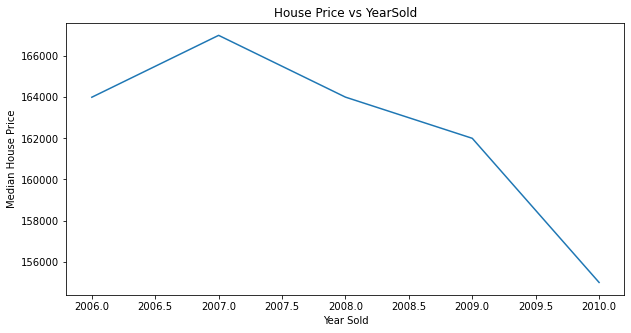

In [7]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

plt.figure(figsize = (10,5))
dt.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")



# With Respect to Different time variable how is the sale price being effected

In [8]:
hide_toggle(for_next=True)

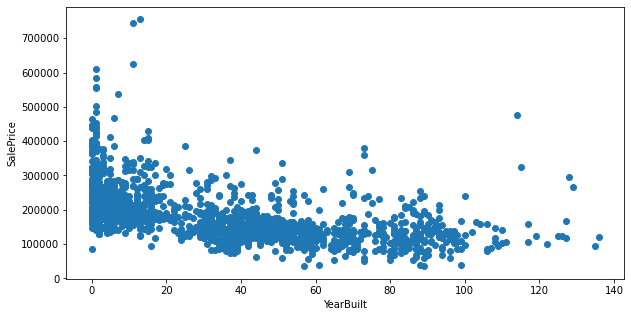

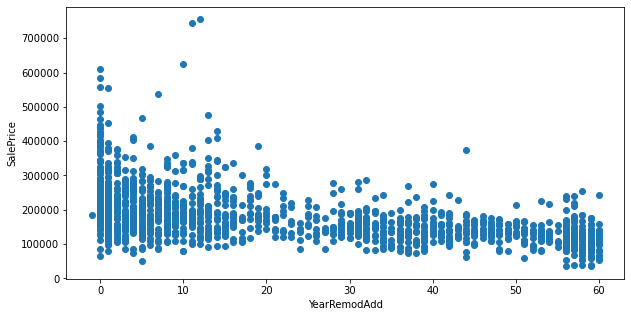

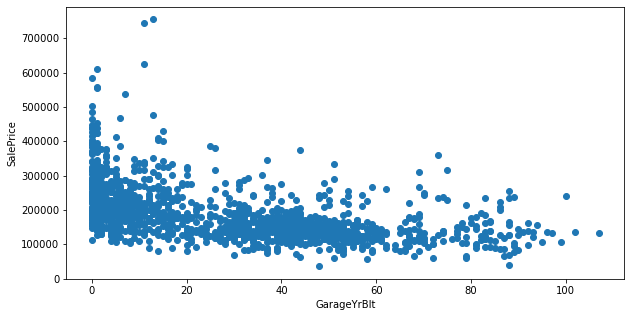

<Figure size 720x360 with 0 Axes>

In [9]:
for feature in year_feature:
    plt.figure(figsize = (10,5))
    if feature!='YrSold':
        data=dt.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


In [10]:
dt.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [11]:
#Here we get to know the number of unique values per categorical column  and even the value which has repeated the most  
dt.describe(include = "object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


<a id="miss"></a>
# Missing Values

In [12]:
a=dt.isnull().sum()
a

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Percentage of Missing Values 

In [13]:
hide_toggle(for_next=True)

In [14]:
dt_c=dt.copy()
# get the count of missing values
missing_values = dt_c.isnull().sum()

# check for missing values
total = dt_c.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((dt_c.isnull().sum()/dt_c.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = dt_c[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageYrBlt,81,5.547945,float64
GarageFinish,81,5.547945,object


# Effect of null values with respect to Sales Price (Target Variable)

In [15]:
hide_toggle(for_next=True)

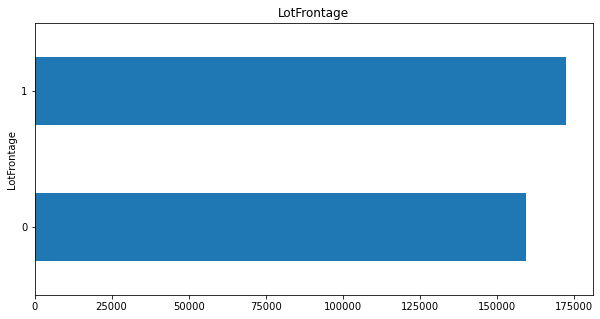

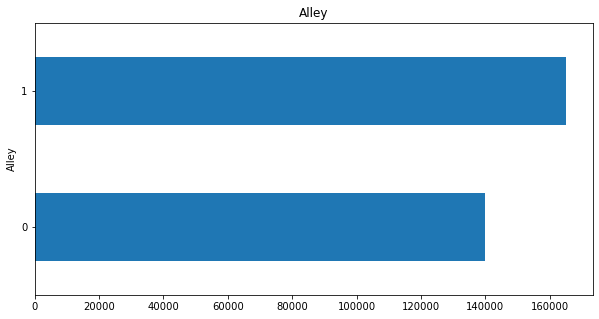

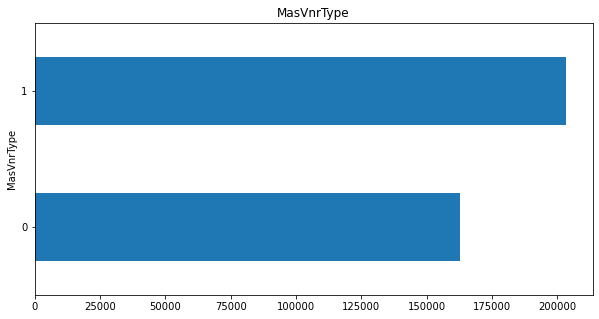

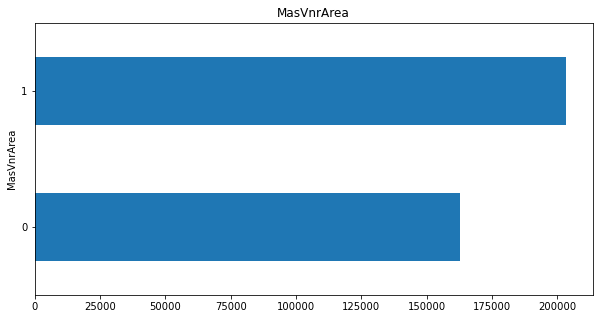

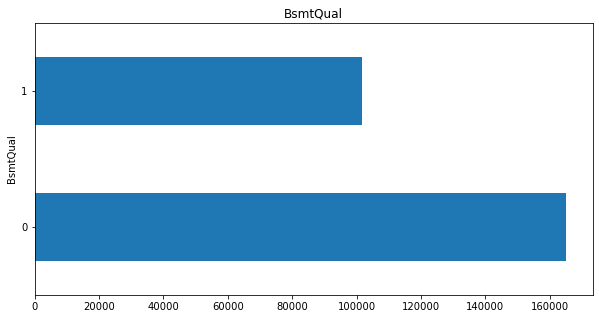

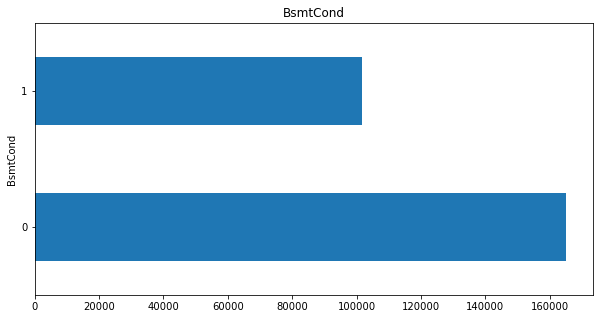

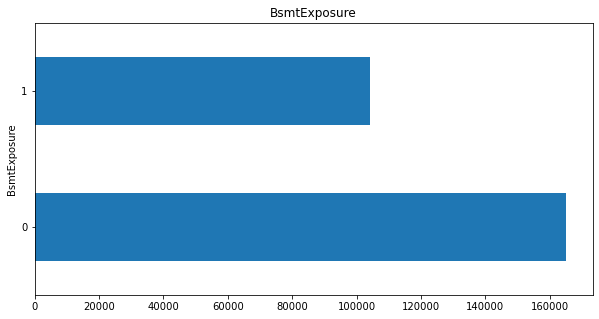

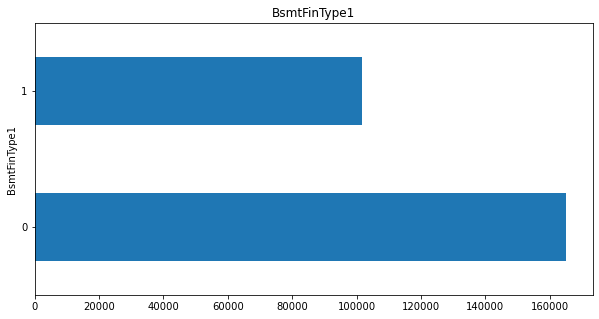

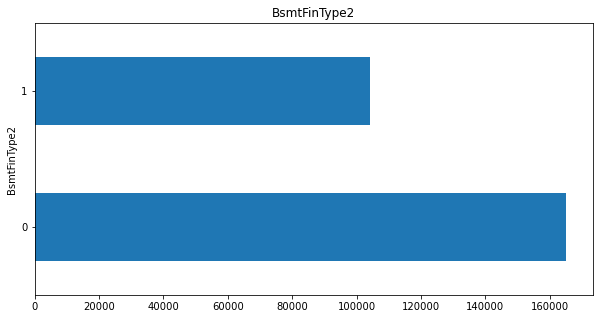

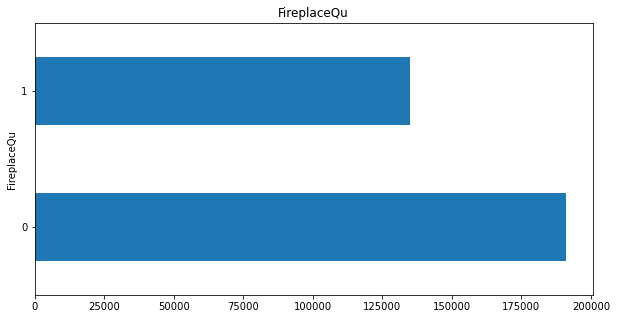

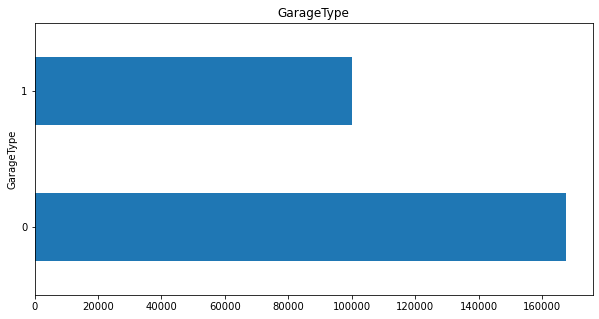

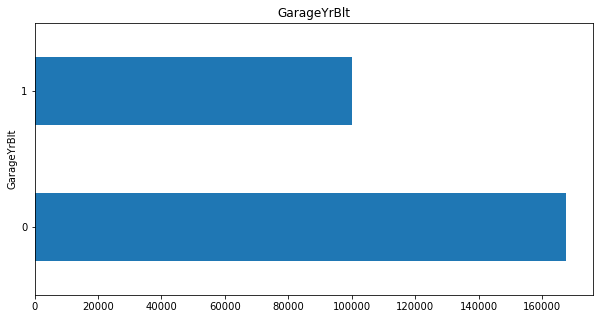

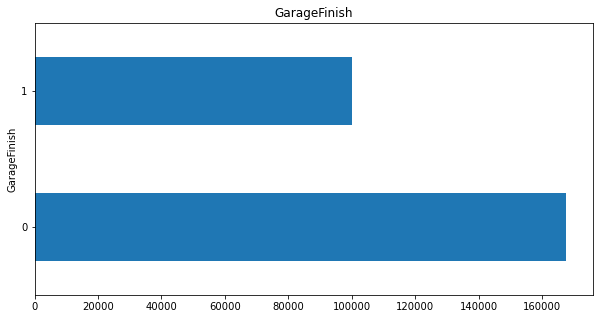

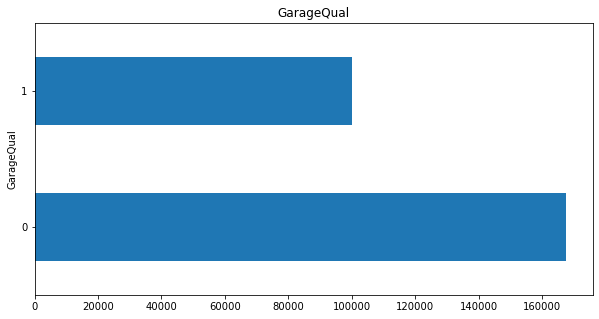

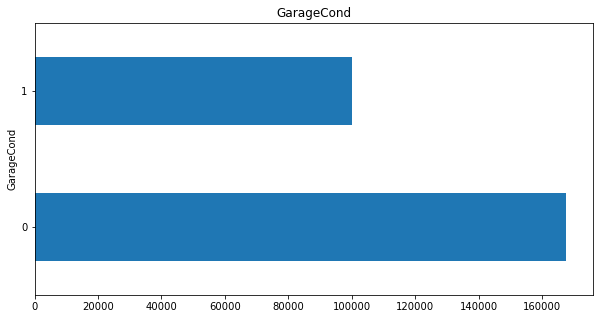

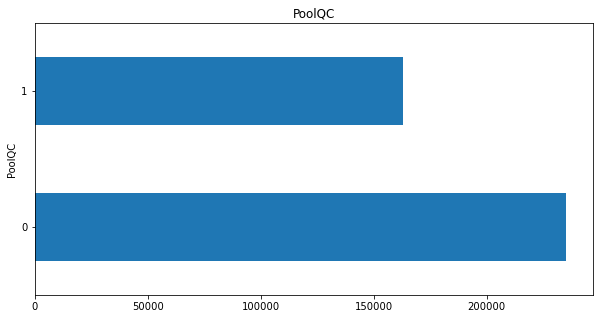

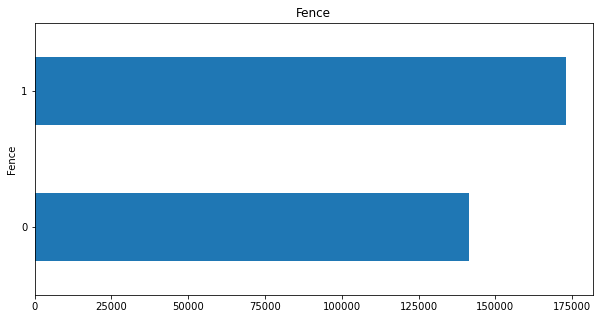

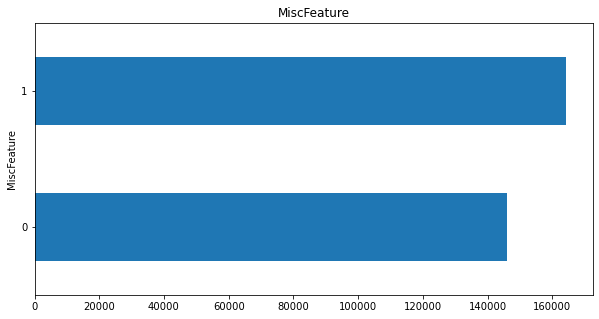

In [16]:
# We will see how the Predictors are varying with target variable 
features_with_na=[features for features in dt_c.columns if dt_c[features].isnull().sum()>1]
for feature in features_with_na:
    plt.figure(figsize = (10,5))
    data = dt_c.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot(kind='barh')
    plt.title(feature)
    plt.show()

In [17]:
# Original Shape of the data 
dt.shape

(1460, 81)

In [18]:
# Shape of the copy  Data before droping
dt_c.shape

(1460, 81)

In [19]:
dt_c.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [20]:
dt_c=dt_c.drop(['PoolQC','Id'],axis=1)
dt_c.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
dt_c.shape

(1460, 79)

<a id="handle"></a>
# Handling Missing Values

In [22]:
hide_toggle(for_next=True)

In [23]:
#dt_c=dt.copy()
# get the count of missing values
missing_values = dt_c.isnull().sum()

# check for missing values
total = dt_c.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((dt_c.isnull().sum()/dt_c.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = dt_c[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object
GarageQual,81,5.547945,object
GarageCond,81,5.547945,object
GarageYrBlt,81,5.547945,float64


<a id="num"></a>
# Numerical Variable

In [24]:
numerical_features = [feature for feature in dt_c.columns if dt_c[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dt_c[numerical_features].head()

Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000000,8450,7,5,2003,2003,196.000000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000000,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.000000,9600,6,8,1976,1976,0.000000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000000,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.000000,11250,7,5,2001,2002,162.000000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000000,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.000000,9550,7,5,1915,1970,0.000000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000000,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.000000,14260,8,5,2000,2000,350.000000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000000,3,836,192,84,0,0,0,0,0,12,2008,250000


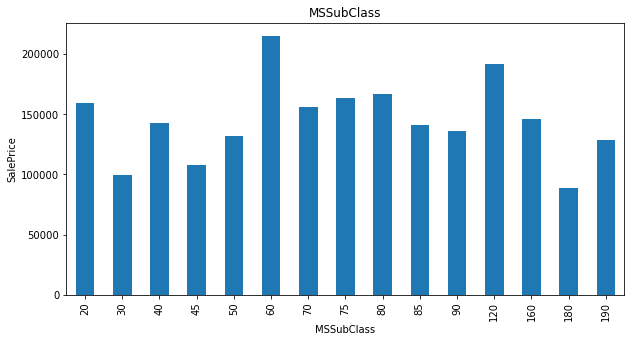

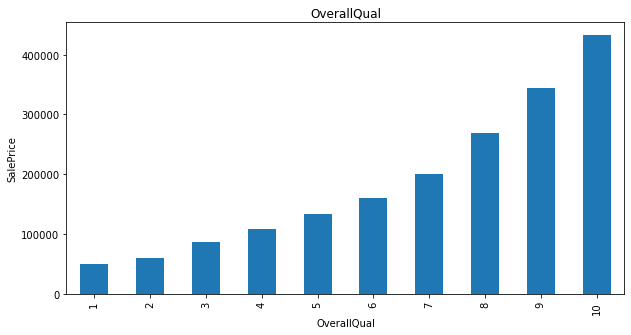

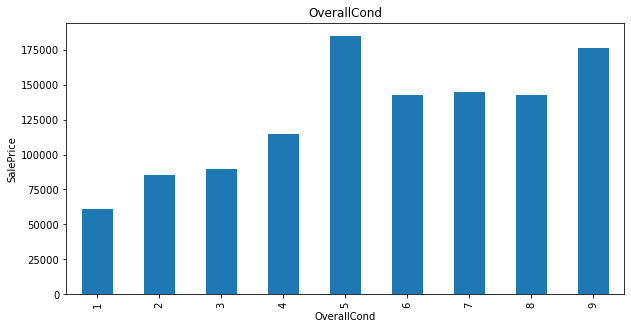

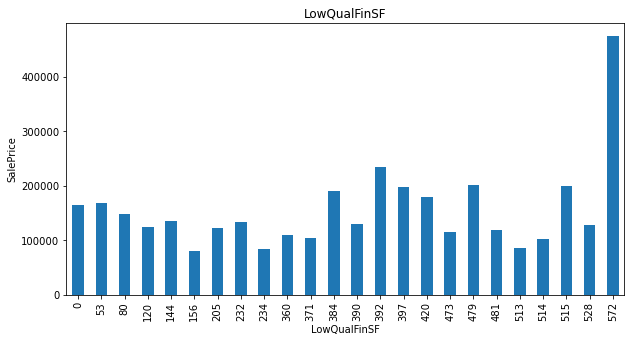

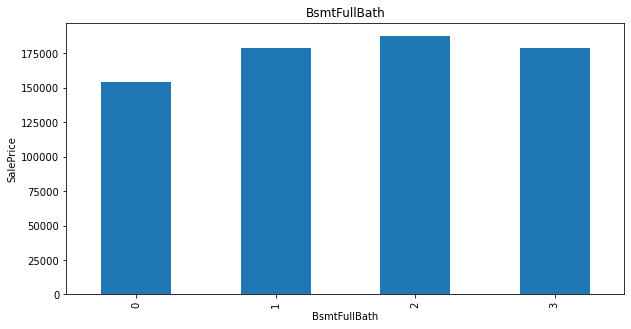

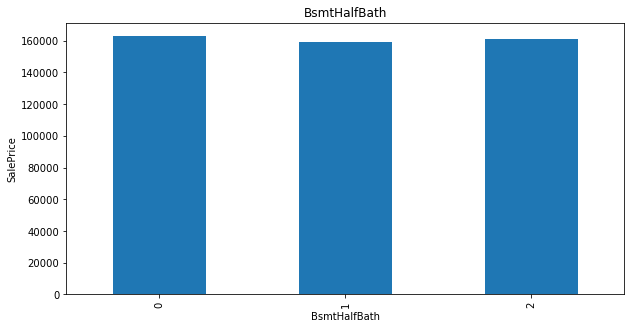

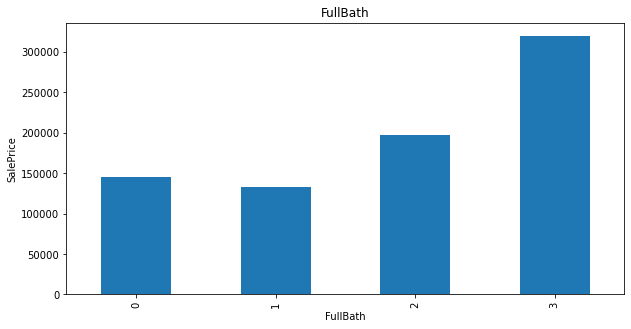

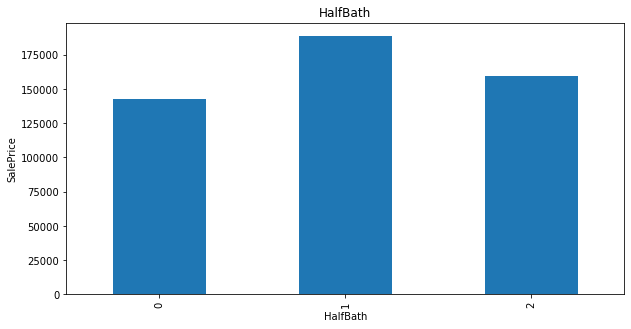

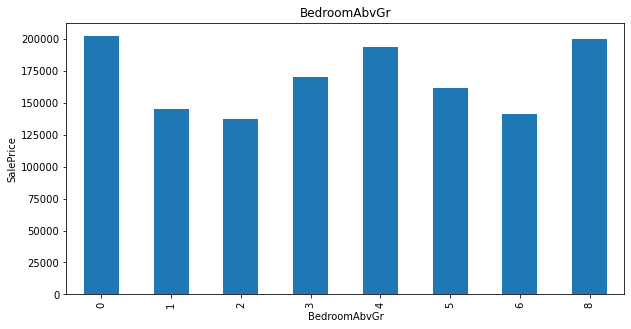

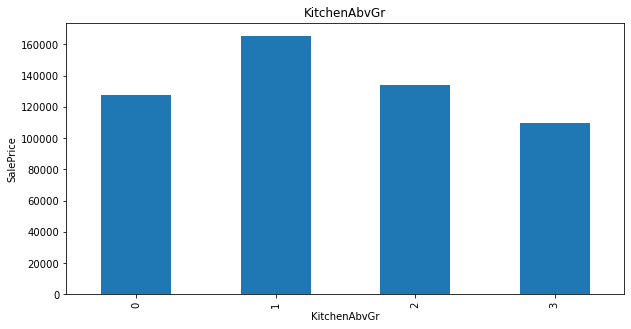

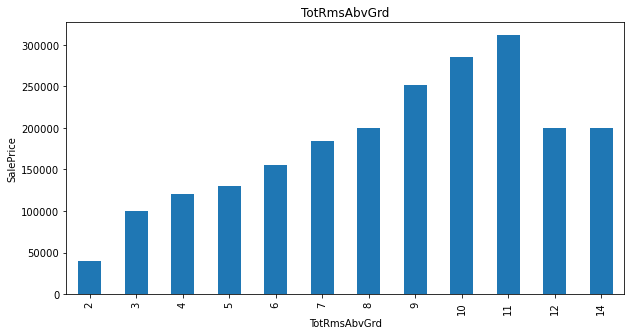

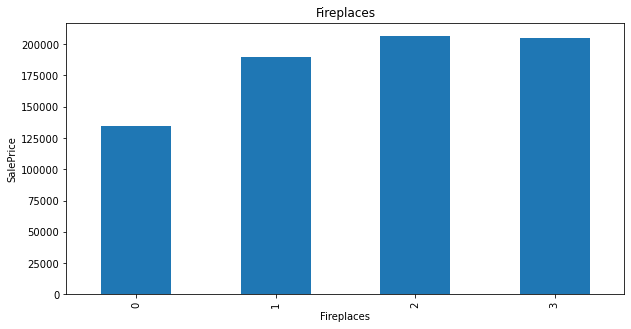

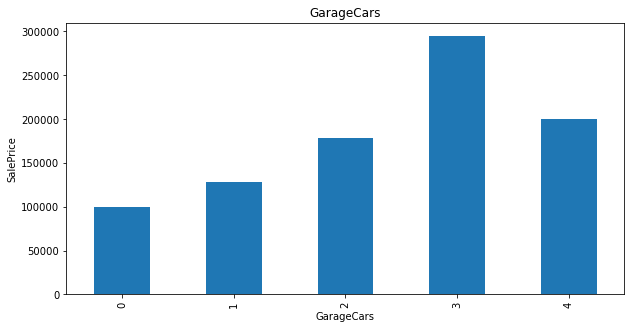

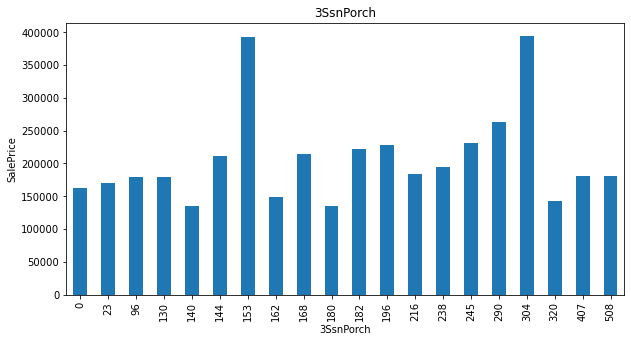

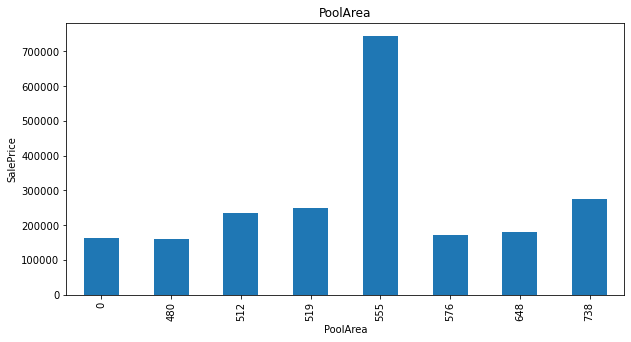

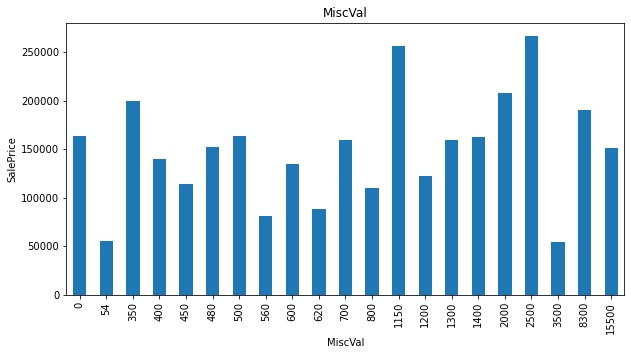

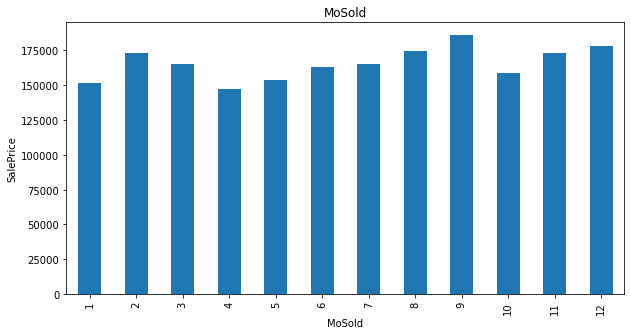

In [25]:
discrete_feature=[feature for feature in numerical_features if len(dt_c[feature].unique())<25 and feature not in year_feature+['Id']]
for feature in discrete_feature:
    plt.figure(figsize = (10,5))
    data=dt_c.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Handling the Missing Values of Numerical Data

In [26]:
numerical_with_nan=[feature for feature in dt_c.columns if dt_c[feature].isnull().sum()>1 and dt_c[feature].dtypes!='O']
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dt_c[feature].median()
    
    ## create a new feature to capture nan values
    #dataset[feature+'nan']=np.where(dt_c[feature].isnull(),1,0)
    dt_c[feature].fillna(median_value,inplace=True)
    
dt_c[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

<a id="cont"></a>
# Continous Variable

#  Normalizing the data 

In [27]:
hide_toggle(for_next=True)

Continuous feature Count 16


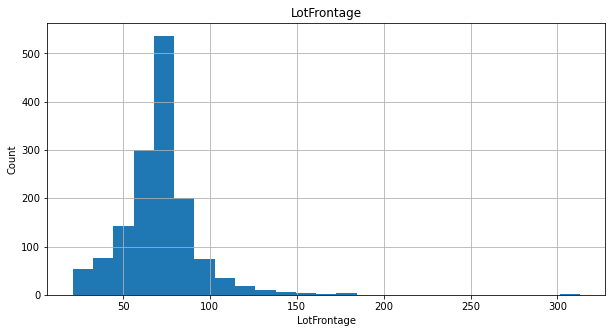

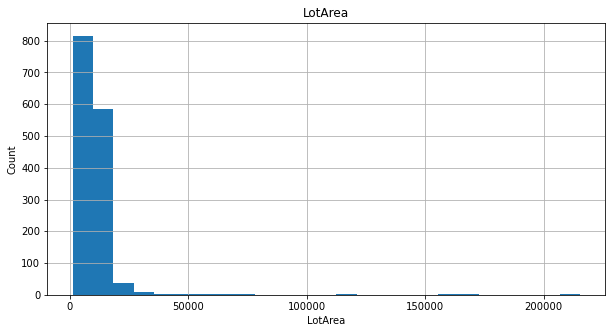

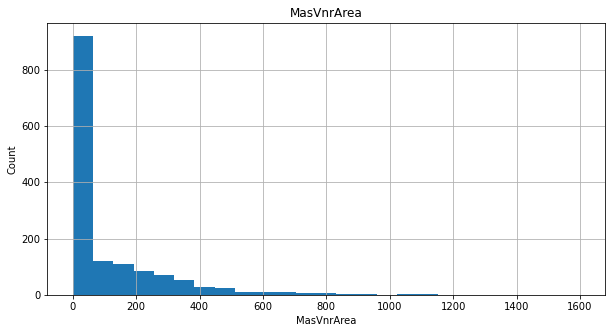

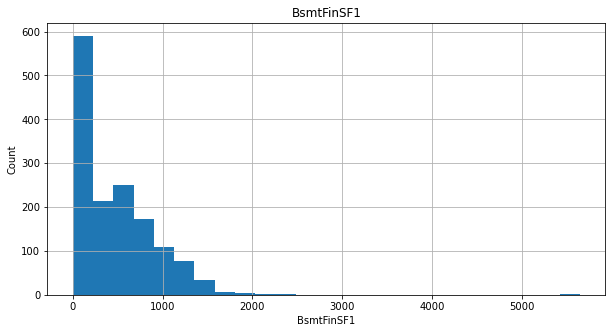

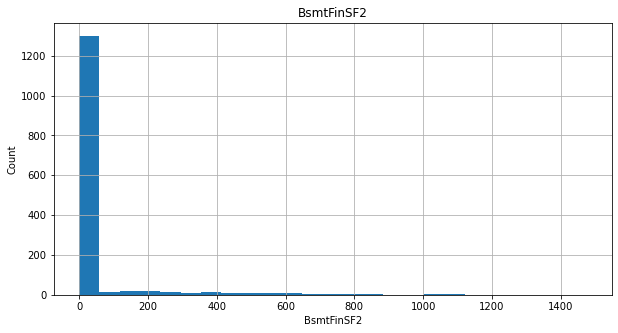

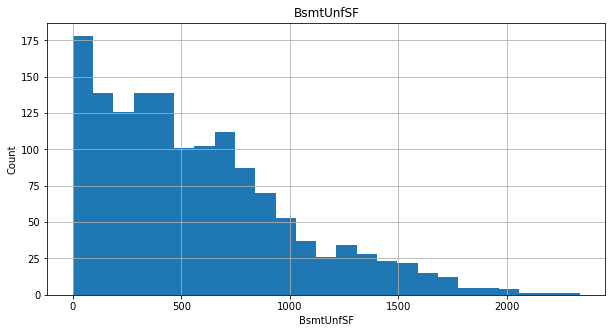

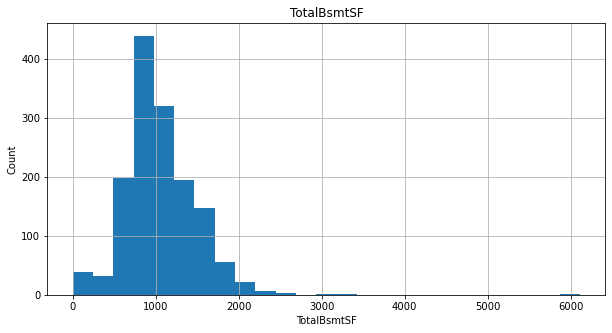

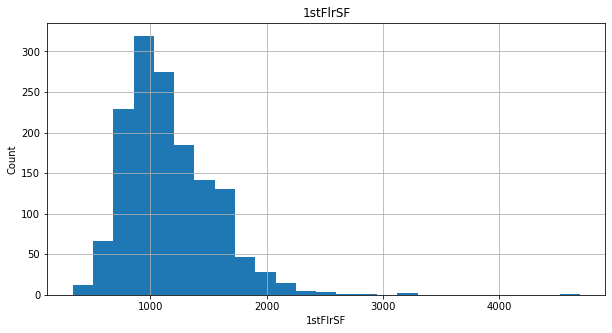

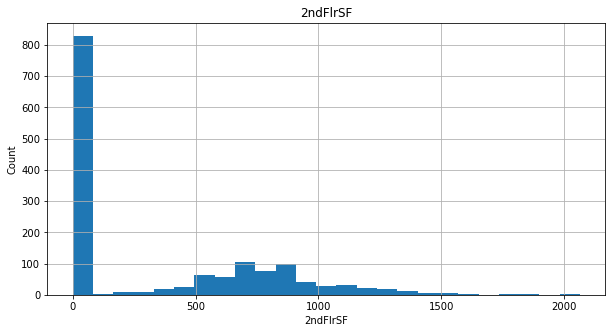

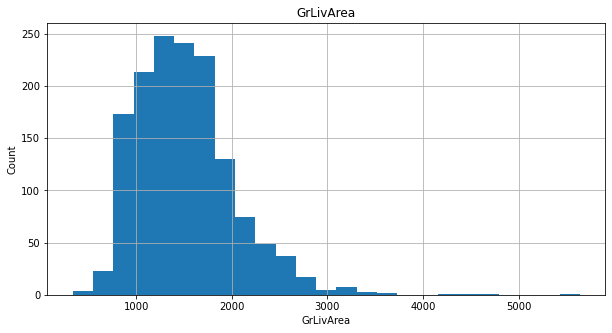

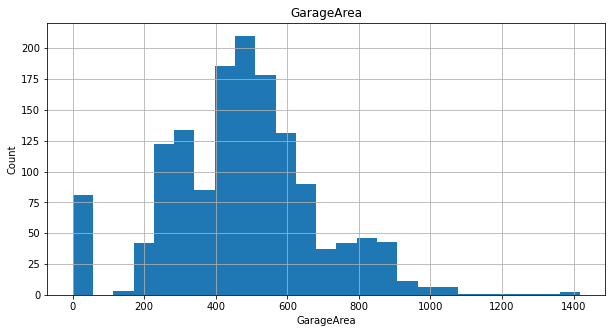

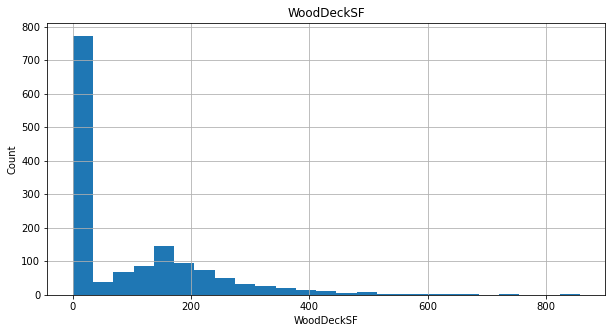

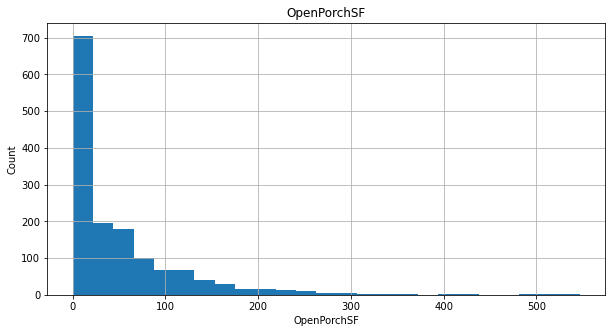

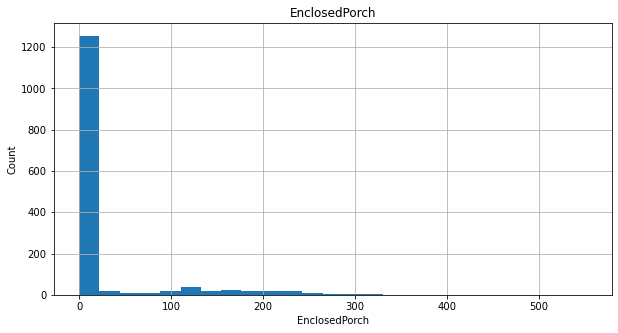

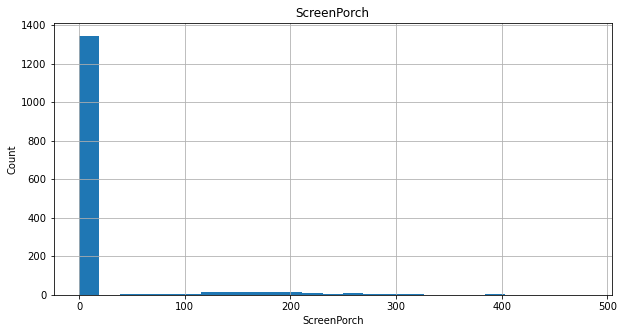

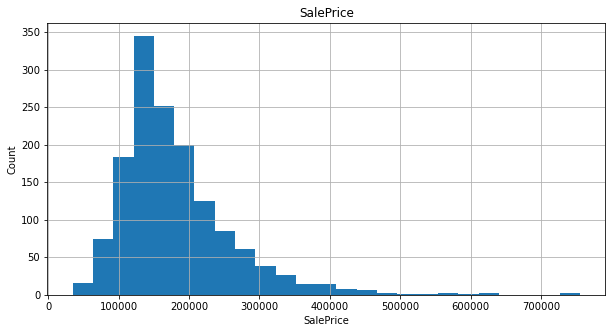

In [28]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
for feature in continuous_feature:
    plt.figure(figsize = (10,5))
    data=dt_c.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Applying Log Transformation so that data is normalized 

In [29]:
hide_toggle(for_next=True)

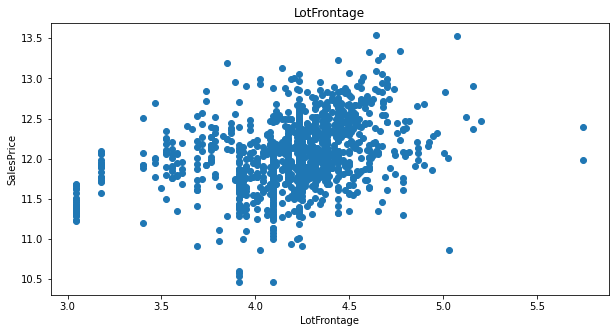

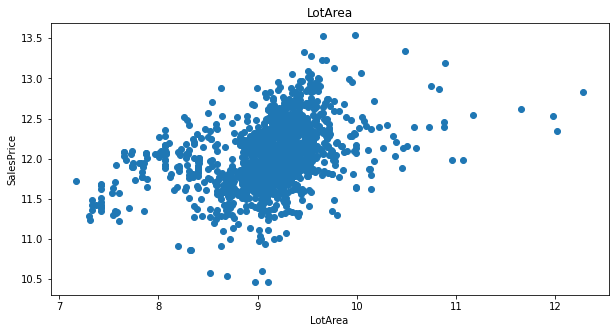

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

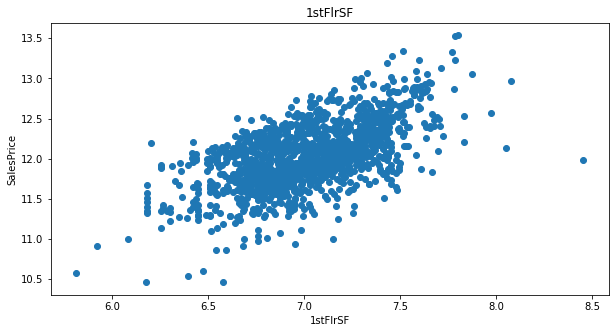

<Figure size 720x360 with 0 Axes>

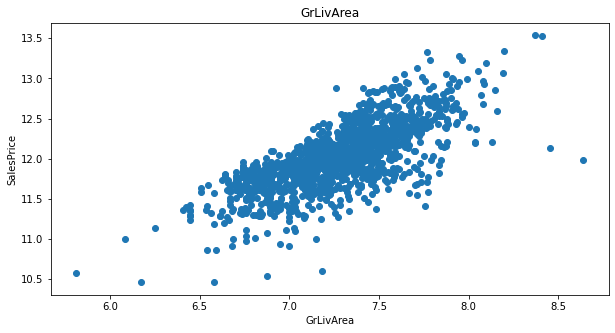

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

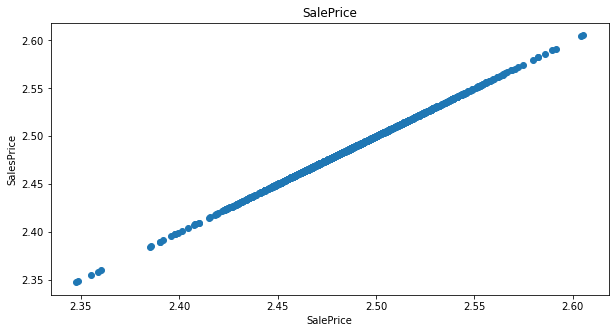

In [30]:
#Here we do the log trasformation of the data which is not skewed 
## We will be using logarithmic transformation
for feature in continuous_feature:
    plt.figure(figsize = (10,5))
    data=dt_c.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [31]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dt_c[feature]=np.log(dt_c[feature])

In [32]:
dt_c.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,12.429216


<a id="outlier"></a>
# Outliers
Here we have done the BoxPlot of Numerical variables to see if outliers are present or not 

In [33]:
hide_toggle(for_next=True)

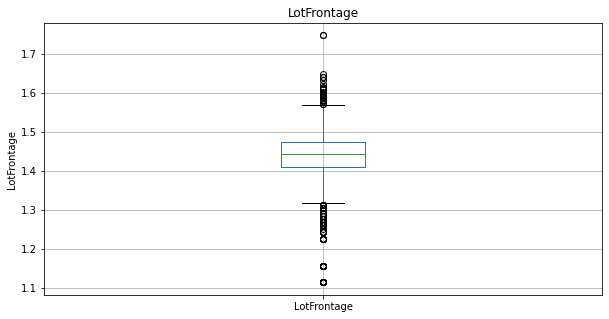

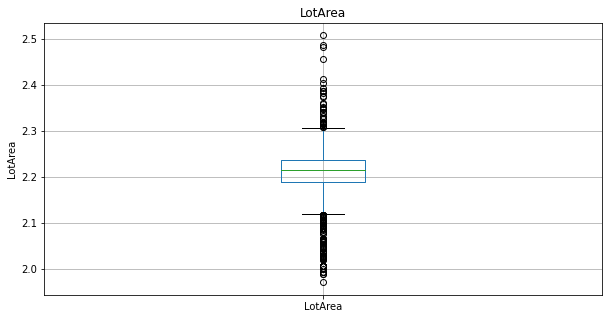

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

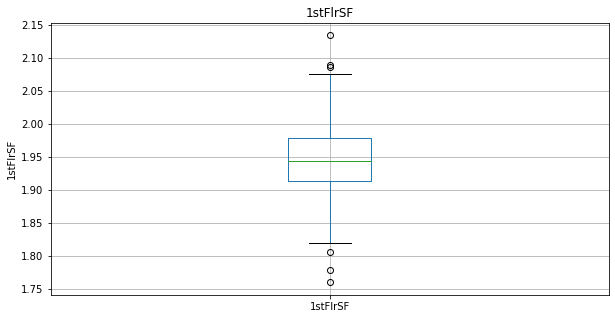

<Figure size 720x360 with 0 Axes>

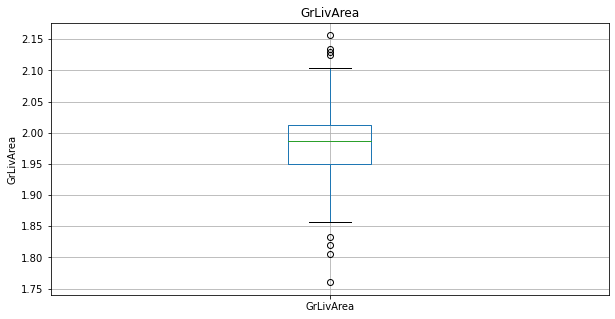

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

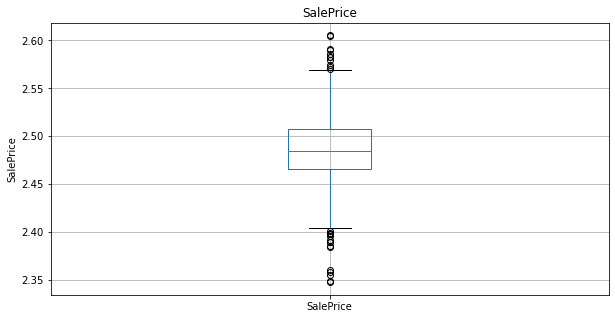

In [34]:
for feature in continuous_feature:
    plt.figure(figsize = (10,5))
    data=dt_c.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

<a id="cat"></a>
# Categorical Variables

In [35]:
categorical_features=[feature for feature in dt_c.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

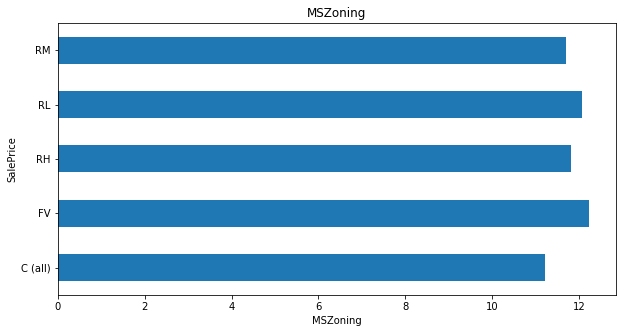

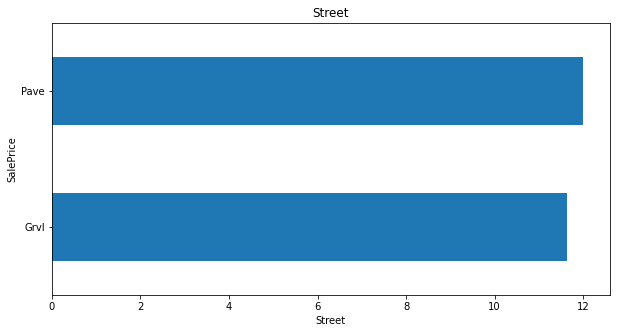

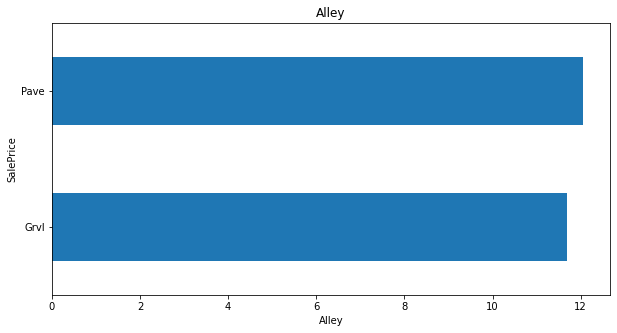

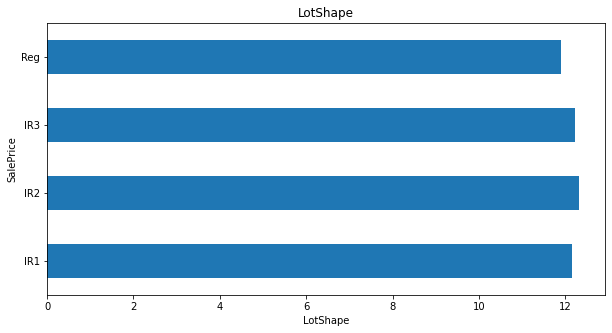

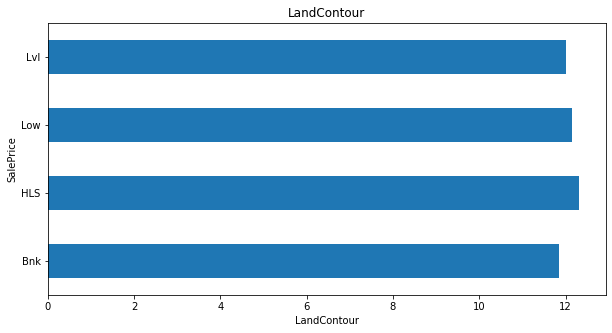

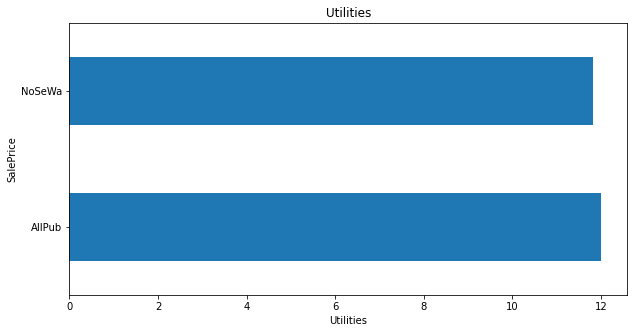

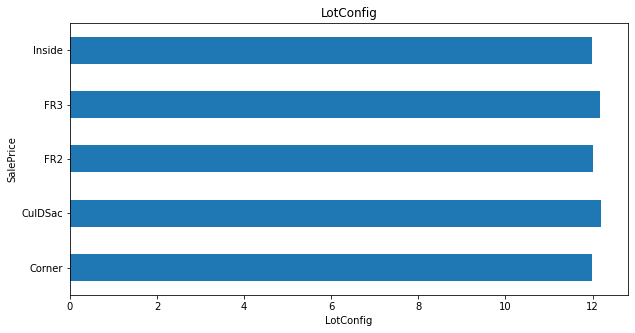

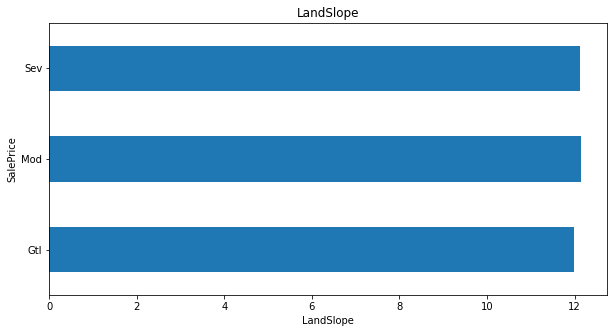

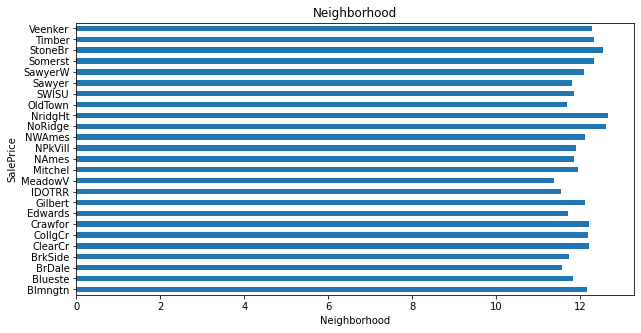

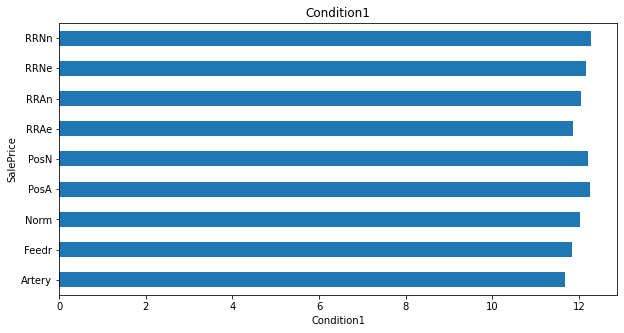

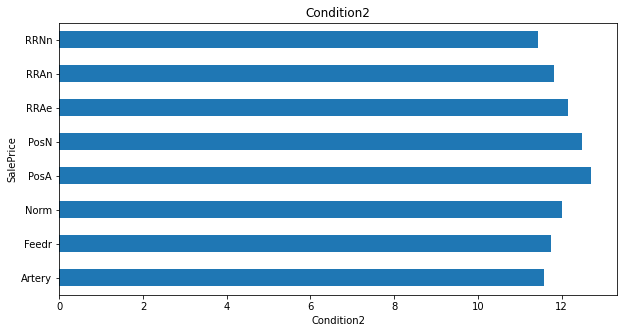

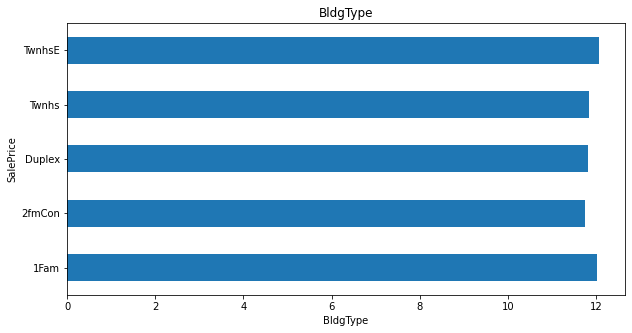

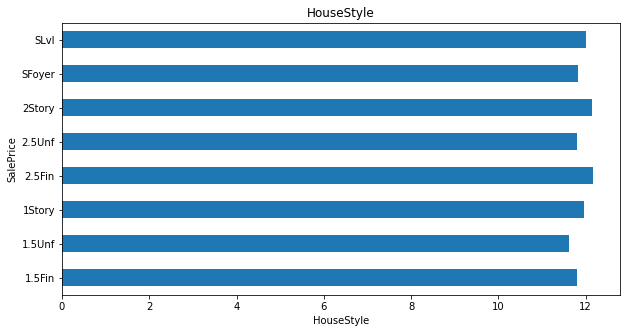

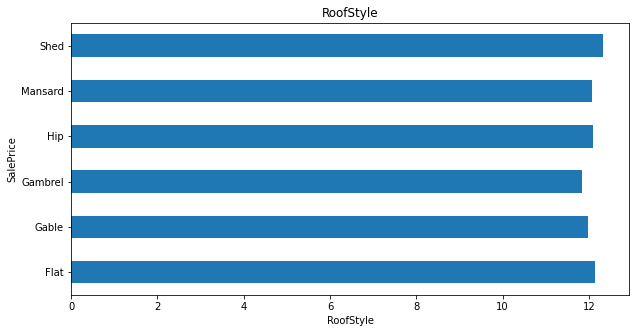

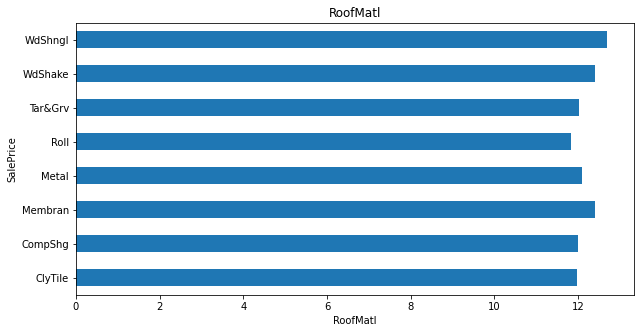

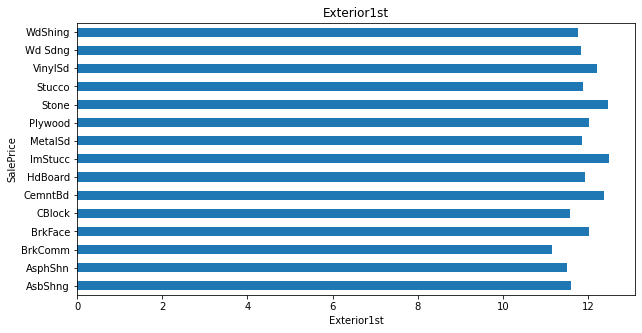

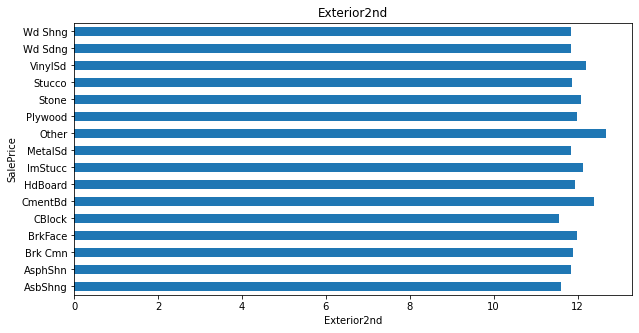

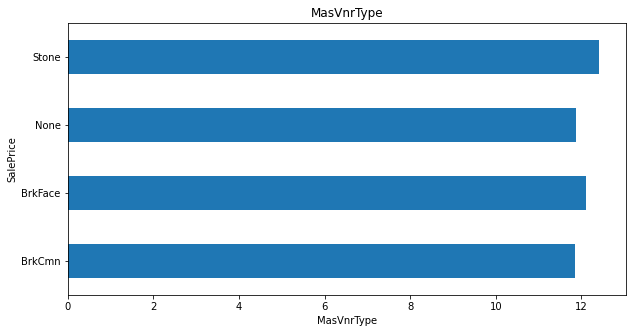

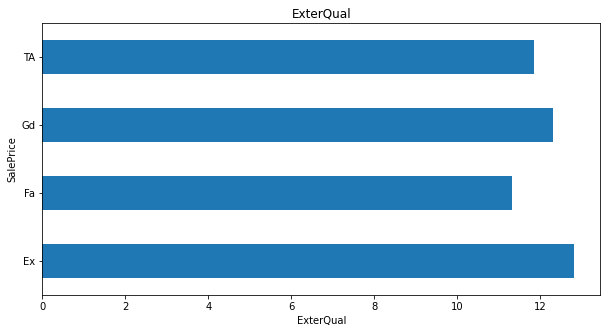

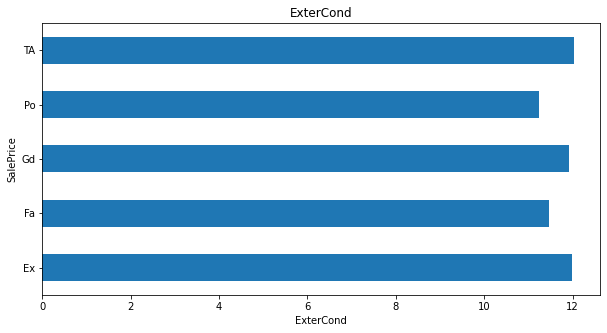

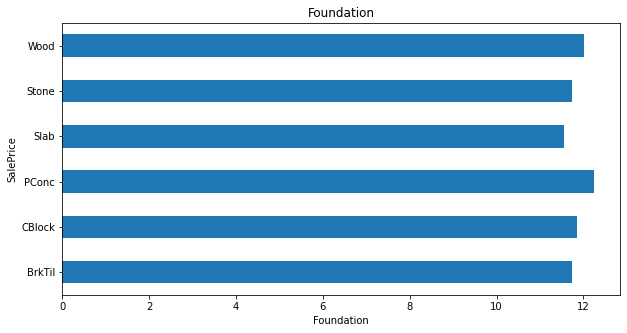

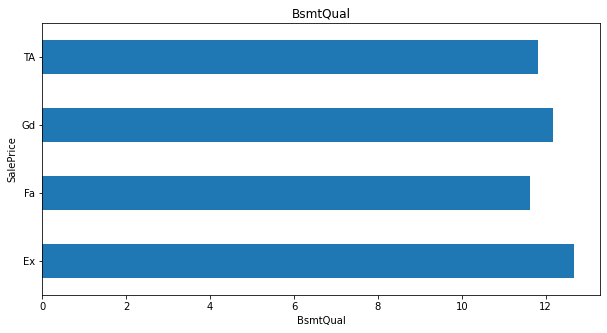

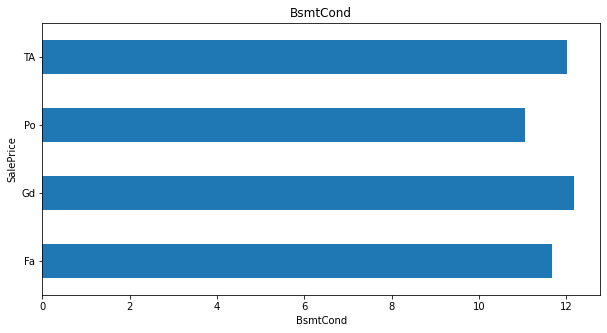

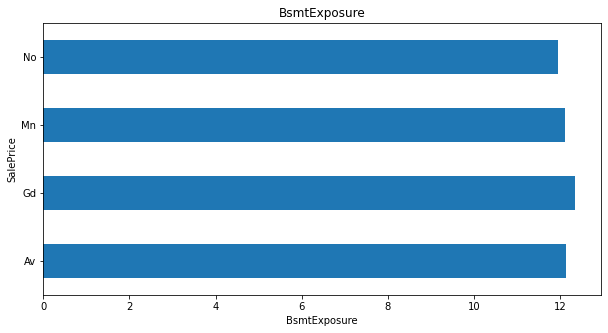

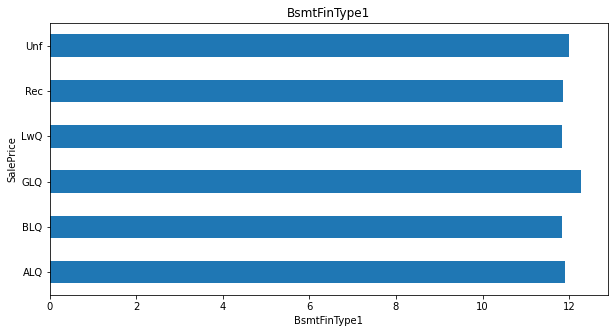

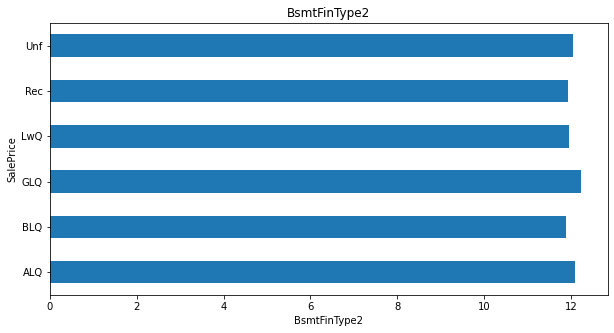

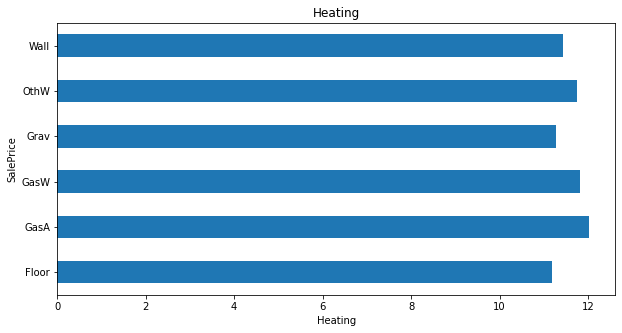

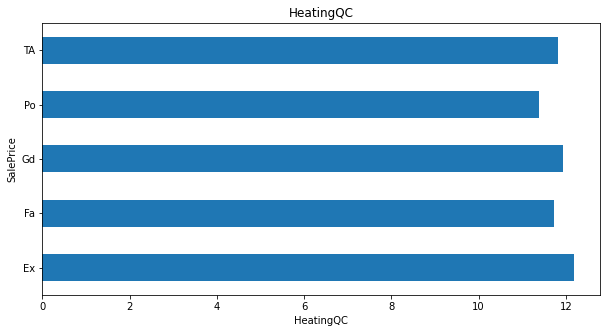

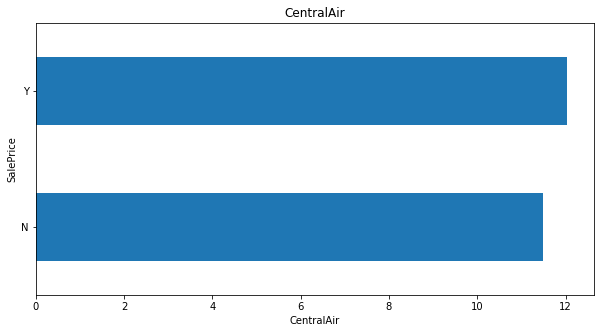

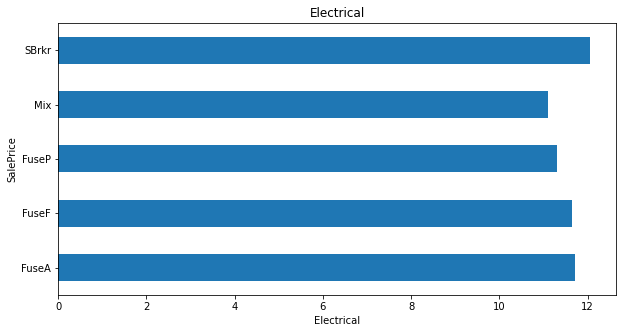

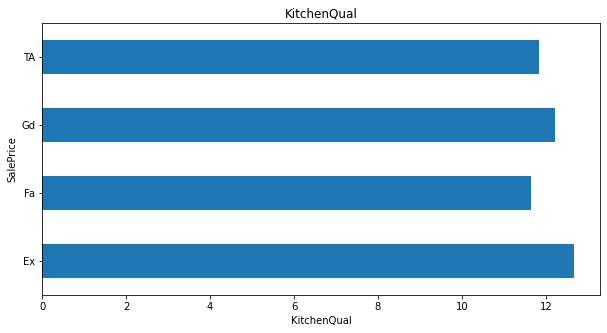

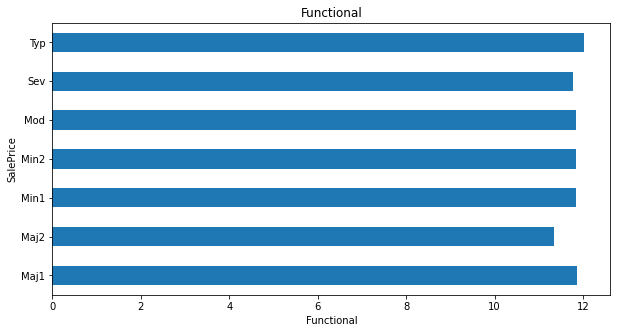

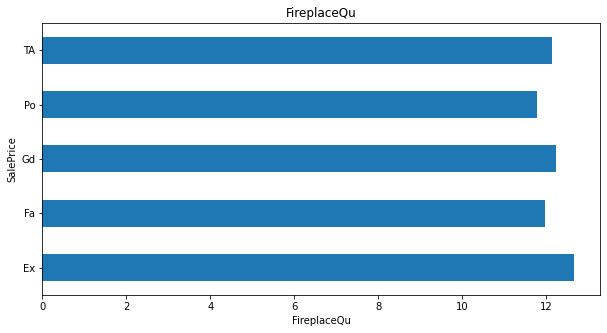

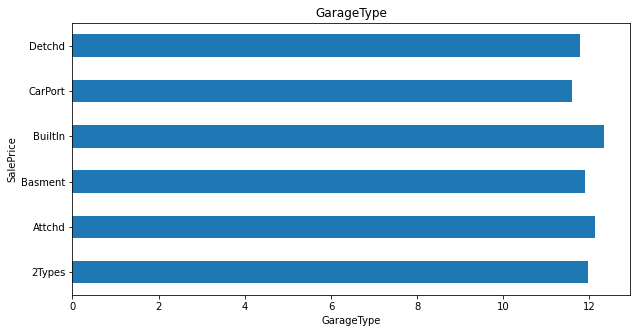

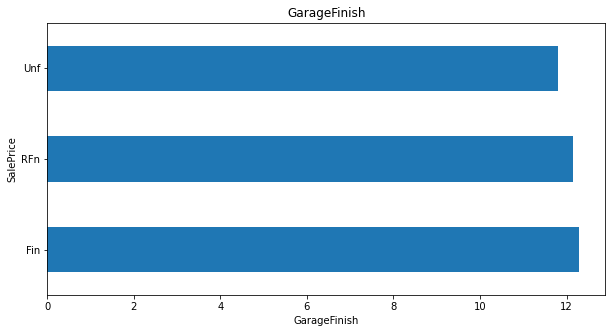

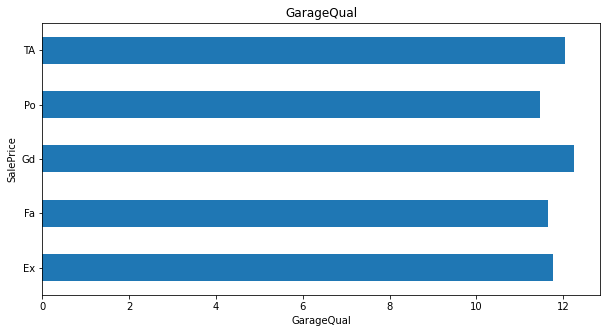

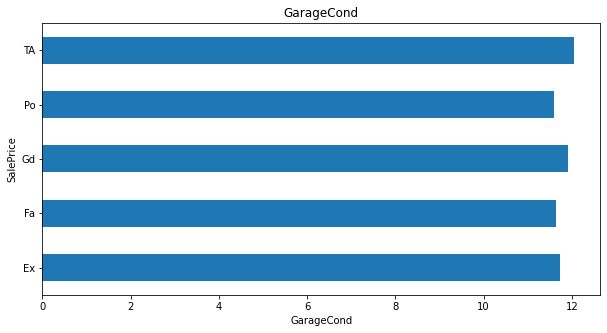

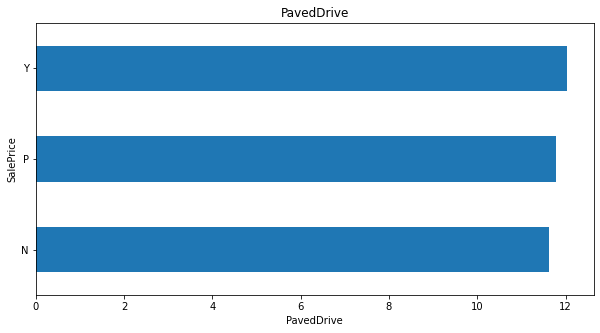

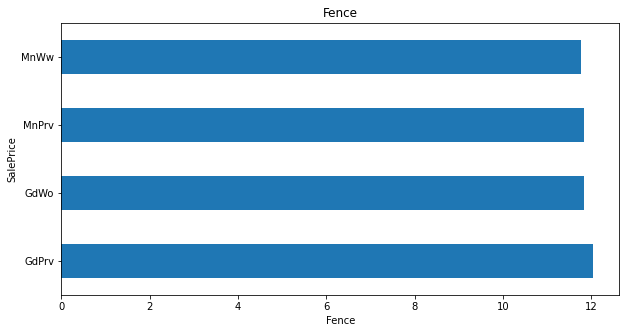

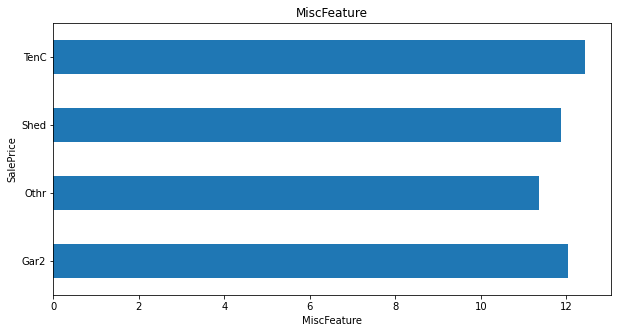

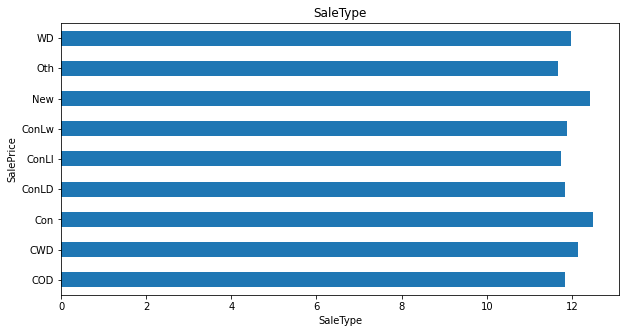

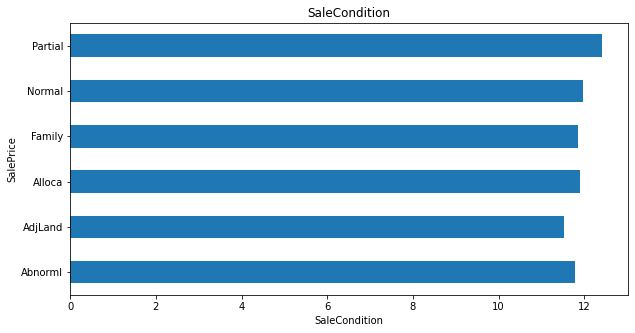

In [36]:
for feature in categorical_features:
    plt.figure(figsize = (10,5))
    data=dt_c.copy()
    data.groupby(feature)['SalePrice'].median().plot(kind='barh')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [37]:
dt_c[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal


# Handling the Missing Values of Categorical Data

In [38]:
features_nan=[feature for feature in dt_c.columns if dt_c[feature].isnull().sum()>1 and dt_c[feature].dtypes=='O']

def replace_cat_feature(dt_c,features_nan):
    data=dt_c.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dt_c=replace_cat_feature(dt_c,features_nan)

dt_c[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
MiscFeature     0
dtype: int64

In [39]:
dt_c.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,0,5,2007,WD,Normal,12.109011


# Handling Rare Categorical Features
We will remove categorical variables that are present less than 1% of the observations

In [40]:
categorical_features=[feature for feature in dt_c.columns if dt_c[feature].dtype=='O']
for feature in categorical_features:
    temp=dt_c.groupby(feature)['SalePrice'].count()/len(dt_c)
    temp_df=temp[temp>0.01].index
    dt_c[feature]=np.where(dt_c[feature].isin(temp_df),dt_c[feature],'Rare_var')

In [41]:
dt_c.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,0,5,2007,WD,Normal,12.109011


<a id="label"></a>
# Label Encoding 

In [42]:
for feature in categorical_features:
    labels_ordered=dt_c.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dt_c[feature]=dt_c[feature].map(labels_ordered)

In [43]:
dt_c.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,2003,2003,0,0,10,10,2,196.000000,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,2003.000000,2,2,548,2,3,2,0,61,0,0,0,0,4,2,0,2,2008,2,3,12.247694
1,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,1976,1976,0,0,4,3,1,0.000000,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,1976.000000,2,2,460,2,3,2,298,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011
2,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,2001,2002,0,0,10,10,2,162.000000,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,2001.000000,2,2,608,2,3,2,0,42,0,0,0,0,4,2,0,9,2008,2,3,12.317167
3,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,1915,1970,0,0,2,4,1,0.000000,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,1998.000000,1,3,642,2,3,2,0,35,272,0,0,0,4,2,0,2,2006,2,0,11.849398
4,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,2000,2000,0,0,10,10,2,350.000000,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,2000.000000,2,3,836,2,3,2,192,84,0,0,0,0,4,2,0,12,2008,2,3,12.429216


<a id="b"></a>
# Feature Engineering

<a id="modify"></a>
# Modifying the Temporal Variable

In [44]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dt_c[feature]=dt_c['YrSold']-dt_c[feature]

In [45]:
dt_c.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.000000,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.000000,2,2,548,2,3,2,0,61,0,0,0,0,4,2,0,2,2008,2,3,12.247694
1,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.000000,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.000000,2,2,460,2,3,2,298,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011
2,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.000000,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.000000,2,2,608,2,3,2,0,42,0,0,0,0,4,2,0,9,2008,2,3,12.317167
3,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.000000,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.000000,1,3,642,2,3,2,0,35,272,0,0,0,4,2,0,2,2006,2,0,11.849398
4,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.000000,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.000000,2,3,836,2,3,2,192,84,0,0,0,0,4,2,0,12,2008,2,3,12.429216


# Feature Scaling

In [46]:
dt_c['SalePrice'].head()

0   12.247694
1   12.109011
2   12.317167
3   11.849398
4   12.429216
Name: SalePrice, dtype: float64

In [47]:
feature_scale=[feature for feature in dt_c.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dt_c[feature_scale])

MinMaxScaler()

In [48]:
scaler.transform(dt_c[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.66666667,
        0.75      ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.66666667,
        0.75      ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.66666667,
        0.75      ]])

In [49]:
dt_c = pd.concat([dt_c[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dt_c[feature_scale]), columns=feature_scale)],
                    axis=1)

In [50]:
dt_c.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.750000,0.418208,0.366344,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.036765,0.098361,0.000000,0.000000,1.000000,1.000000,0.500000,0.122500,0.666667,1.000000,1.000000,0.750000,0.750000,0.250000,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.000000,1.000000,1.000000,1.000000,0.356155,0.413559,0.000000,0.577712,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.500000,1.000000,0.000000,0.200000,0.800000,0.046729,0.666667,0.500000,0.386460,0.666667,1.000000,1.000000,0.000000,0.111517,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.500000,0.666667,0.750000
1,12.109011,0.000000,0.750000,0.495064,0.391317,1.000000,1.000000,0.000000,0.333333,1.000000,0.500000,0.000000,0.500000,0.200000,1.000000,0.750000,0.600000,0.555556,0.875000,0.227941,0.524590,0.000000,0.000000,0.400000,0.300000,0.250000,0.000000,0.333333,1.000000,0.500000,0.750000,0.750000,1.000000,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.000000,1.000000,1.000000,1.000000,0.503056,0.000000,0.000000,0.470245,0.000000,0.500000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,1.000000,0.333333,0.600000,0.800000,0.289720,0.666667,0.500000,0.324401,0.666667,1.000000,1.000000,0.347725,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.363636,0.250000,0.666667,0.750000
2,12.317167,0.235294,0.750000,0.434909,0.422359,1.000000,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.051471,0.114754,0.000000,0.000000,1.000000,1.000000,0.500000,0.101250,0.666667,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.000000,1.000000,1.000000,1.000000,0.383441,0.419370,0.000000,0.593095,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.333333,1.000000,0.333333,0.600000,0.800000,0.065421,0.666667,0.500000,0.428773,0.666667,1.000000,1.000000,0.000000,0.076782,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.727273,0.500000,0.666667,0.750000
3,11.849398,0.294118,0.750000,0.388581,0.390295,1.000000,1.000000,0.333333,0.333333,1.000000,0.250000,0.000000,0.727273,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.669118,0.606557,0.000000,0.000000,0.200000,0.400000,0.250000,0.000000,0.333333,1.000000,0.250000,0.500000,1.000000,0.250000,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.000000,0.750000,1.000000,1.000000,0.399941,0.366102,0.000000,0.579157,0.333333,0.000000,0.333333,0.000000,0.375000,0.333333,0.666667,0.416667,1.000000,0.333333,0.800000,0.400000,0.074766,0.333333,0.750000,0.452750,0.666667,1.000000,1.000000,0.000000,0.063985,0.492754,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.000000,0.666667,0.000000
4,12.429216,0.235294,0.750000,0.513123,0.468761,1.000000,1.000000,0.333333,0.333333,1.000000,0.500000,0.000000,1.000000,0.400000,1.000000,0.750000,1.000000,0.777778,0.500000,0.058824,0.147541,0.000000,0.000000,1.000000,1.000000,0.500000,0.218750,0.666667,1.000000,1.000000,0.750000,0.750000,0.75000

In [51]:
dt_c.shape

(1460, 79)

# After that we check if still any outliers are present in the data or not 

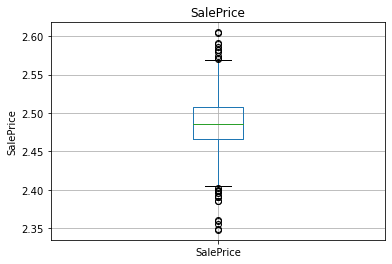

In [52]:
for feature in continuous_feature:
    #plt.figure(figsize = (10,5))
    data=dt_c.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# At last saving the clean data into a seperate file

In [53]:
dt_c.to_csv('Project_train1.csv',index=False)

<a id="c"></a>
# Feature Selection

![](s3.jpg)

<a id="forward"></a>
# Forward Selection

# Importing the Data 

In [54]:
dt=pd.read_csv('Project_train1.csv')
dt.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.750000,0.418208,0.366344,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.036765,0.098361,0.000000,0.000000,1.000000,1.000000,0.500000,0.122500,0.666667,1.000000,1.000000,0.750000,0.750000,0.250000,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.000000,1.000000,1.000000,1.000000,0.356155,0.413559,0.000000,0.577712,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.500000,1.000000,0.000000,0.200000,0.800000,0.046729,0.666667,0.500000,0.386460,0.666667,1.000000,1.000000,0.000000,0.111517,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.500000,0.666667,0.750000
1,12.109011,0.000000,0.750000,0.495064,0.391317,1.000000,1.000000,0.000000,0.333333,1.000000,0.500000,0.000000,0.500000,0.200000,1.000000,0.750000,0.600000,0.555556,0.875000,0.227941,0.524590,0.000000,0.000000,0.400000,0.300000,0.250000,0.000000,0.333333,1.000000,0.500000,0.750000,0.750000,1.000000,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.000000,1.000000,1.000000,1.000000,0.503056,0.000000,0.000000,0.470245,0.000000,0.500000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,1.000000,0.333333,0.600000,0.800000,0.289720,0.666667,0.500000,0.324401,0.666667,1.000000,1.000000,0.347725,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.363636,0.250000,0.666667,0.750000
2,12.317167,0.235294,0.750000,0.434909,0.422359,1.000000,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.051471,0.114754,0.000000,0.000000,1.000000,1.000000,0.500000,0.101250,0.666667,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.000000,1.000000,1.000000,1.000000,0.383441,0.419370,0.000000,0.593095,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.333333,1.000000,0.333333,0.600000,0.800000,0.065421,0.666667,0.500000,0.428773,0.666667,1.000000,1.000000,0.000000,0.076782,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.727273,0.500000,0.666667,0.750000
3,11.849398,0.294118,0.750000,0.388581,0.390295,1.000000,1.000000,0.333333,0.333333,1.000000,0.250000,0.000000,0.727273,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.669118,0.606557,0.000000,0.000000,0.200000,0.400000,0.250000,0.000000,0.333333,1.000000,0.250000,0.500000,1.000000,0.250000,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.000000,0.750000,1.000000,1.000000,0.399941,0.366102,0.000000,0.579157,0.333333,0.000000,0.333333,0.000000,0.375000,0.333333,0.666667,0.416667,1.000000,0.333333,0.800000,0.400000,0.074766,0.333333,0.750000,0.452750,0.666667,1.000000,1.000000,0.000000,0.063985,0.492754,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.000000,0.666667,0.000000
4,12.429216,0.235294,0.750000,0.513123,0.468761,1.000000,1.000000,0.333333,0.333333,1.000000,0.500000,0.000000,1.000000,0.400000,1.000000,0.750000,1.000000,0.777778,0.500000,0.058824,0.147541,0.000000,0.000000,1.000000,1.000000,0.500000,0.218750,0.666667,1.000000,1.000000,0.750000,0.750000,0.75000

<a id="tt"></a>
# Train -Test Split for Forward Selection 

In [55]:
df_energy_cons = dt.copy()

# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_energy_cons.drop('SalePrice', axis = 1)

# dependent variable
y = df_energy_cons['SalePrice']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

<a id="fs"></a>
# Forward Selection Features

In [56]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here 'best' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator=linreg, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    0.9s finished

[2021-05-16 22:33:55] Features: 1/78 -- score: 0.6651562128658707[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    0.8s finished

[2021-05-16 22:33:56] Features: 2/78 -- score: 0.7419526741315712[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.8s finished

[2021-05-16 22:33:57] Features: 3/78 -- score: 0.8015508116858001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.6s finished

[2021-05-16 22:34:21] Features: 28/78 -- score: 0.8965136714599673[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished

[2021-05-16 22:34:21] Features: 29/78 -- score: 0.8966114329841721[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.7s finished

[2021-05-16 22:34:22] Features: 30/78 -- score: 0.8966897547910462[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished

[2021-05-16 22:34:23] Features: 31/

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished

[2021-05-16 22:34:43] Features: 56/78 -- score: 0.8853327813076378[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2021-05-16 22:34:43] Features: 57/78 -- score: 0.8847928864270667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s finished

[2021-05-16 22:34:44] Features: 58/78 -- score: -1.8942438089456408e+22[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished

[2021-05-16 22:34:44] Features

In [57]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)
print(len(sfs_forward.k_feature_names_))
# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('MSZoning', 'LotArea', 'Street', 'LandContour', 'Utilities', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SaleCondition')
37

R-Squared:  0.897134620465631


<a id="vif"></a>
# Seeing the relationship with other variables by VIF factor

In [58]:
dt_c=dt.copy()
# filter the numerical features in the dataset
df_numeric_features_vif = dt_c.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.750000,0.418208,0.366344,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.036765,0.098361,0.000000,0.000000,1.000000,1.000000,0.500000,0.122500,0.666667,1.000000,1.000000,0.750000,0.750000,0.250000,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.000000,1.000000,1.000000,1.000000,0.356155,0.413559,0.000000,0.577712,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.500000,1.000000,0.000000,0.200000,0.800000,0.046729,0.666667,0.500000,0.386460,0.666667,1.000000,1.000000,0.000000,0.111517,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.500000,0.666667,0.750000
1,12.109011,0.000000,0.750000,0.495064,0.391317,1.000000,1.000000,0.000000,0.333333,1.000000,0.500000,0.000000,0.500000,0.200000,1.000000,0.750000,0.600000,0.555556,0.875000,0.227941,0.524590,0.000000,0.000000,0.400000,0.300000,0.250000,0.000000,0.333333,1.000000,0.500000,0.750000,0.750000,1.000000,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.000000,1.000000,1.000000,1.000000,0.503056,0.000000,0.000000,0.470245,0.000000,0.500000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,1.000000,0.333333,0.600000,0.800000,0.289720,0.666667,0.500000,0.324401,0.666667,1.000000,1.000000,0.347725,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.363636,0.250000,0.666667,0.750000
2,12.317167,0.235294,0.750000,0.434909,0.422359,1.000000,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.051471,0.114754,0.000000,0.000000,1.000000,1.000000,0.500000,0.101250,0.666667,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.000000,1.000000,1.000000,1.000000,0.383441,0.419370,0.000000,0.593095,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.333333,1.000000,0.333333,0.600000,0.800000,0.065421,0.666667,0.500000,0.428773,0.666667,1.000000,1.000000,0.000000,0.076782,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.727273,0.500000,0.666667,0.750000
3,11.849398,0.294118,0.750000,0.388581,0.390295,1.000000,1.000000,0.333333,0.333333,1.000000,0.250000,0.000000,0.727273,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.669118,0.606557,0.000000,0.000000,0.200000,0.400000,0.250000,0.000000,0.333333,1.000000,0.250000,0.500000,1.000000,0.250000,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.000000,0.750000,1.000000,1.000000,0.399941,0.366102,0.000000,0.579157,0.333333,0.000000,0.333333,0.000000,0.375000,0.333333,0.666667,0.416667,1.000000,0.333333,0.800000,0.400000,0.074766,0.333333,0.750000,0.452750,0.666667,1.000000,1.000000,0.000000,0.063985,0.492754,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.000000,0.666667,0.000000
4,12.429216,0.235294,0.750000,0.513123,0.468761,1.000000,1.000000,0.333333,0.333333,1.000000,0.500000,0.000000,1.000000,0.400000,1.000000,0.750000,1.000000,0.777778,0.500000,0.058824,0.147541,0.000000,0.000000,1.000000,1.000000,0.500000,0.218750,0.666667,1.000000,1.000000,0.750000,0.750000,0.75000

# Here we get to know the vif factor with respect to each and every variable 

In [59]:
hide_toggle(for_next=True)

In [60]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()
# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns
# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,TotalBsmtSF
1,inf,BsmtUnfSF
2,inf,BsmtFinSF2
3,inf,BsmtFinSF1
4,3061.460013,SalePrice
5,1397.071632,Utilities
6,514.139740,GrLivArea
7,283.551204,Street
8,237.274612,1stFlrSF
9,142.934467,MiscFeature


# After Knowing the vif factor all the insignificant variables are removed and significant ones are retained whose vif factor is less than <10

In [61]:
hide_toggle(for_next=True)

In [62]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor       Features
0     2.111924     MSSubClass
1     1.920533       LotShape
2     7.276107    LandContour
3     1.460132      LotConfig
4     1.352096      LandSlope
5     9.376254   Neighborhood
6     9.997829     Condition1
7     9.632718      YearBuilt
8     4.181937   YearRemodAdd
9     1.487018      RoofStyle
10    1.160897       RoofMatl
11    6.532602    Exterior2nd
12    6.365038     MasVnrType
13    2.123239     MasVnrArea
14    5.162046   BsmtExposure
15    9.718728   BsmtFinType1
16    4.665915     BsmtFinSF1
17    1.335613     BsmtFinSF2
18    3.569755       2ndFlrSF
19    1.113745   LowQualFinSF
20    3.701988   BsmtFullBath
21    1.213820   BsmtHalfBath
22    2.845143       HalfBath
23    2.651444     Fireplaces
24    7.699890    GarageYrBlt
25    8.288578   GarageFinish
26    1.910875     WoodDeckSF
27    1.768741    OpenPorchSF
28    1.405232  EnclosedPorch
29    1.038308      3SsnPorch
30    1.192234    ScreenPorch
31    1.093785       PoolArea
32    1.02

<a id="ml1"></a>
# Machine Learning Model 1 
The Predictor variable are chosen by the forward selection in this model 

In [63]:
df_compensation=dt_c.copy()
df_feature = df_compensation[['MSZoning', 'LotArea', 'Street', 'LandContour', 'Utilities', 'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SaleCondition']]

# create dataframe of target variable
df_target = df_compensation['SalePrice']

In [64]:
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['MSZoning', 'LotArea', 'Street', 'LandContour', 'Utilities',
       'Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageCars', 'WoodDeckSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SaleCondition'],
      dtype='object')

In [65]:
hide_toggle(for_next=True)

In [66]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_num.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (1022, 38)
y_train_full (1022,)
X_test_full (438, 38)
y_test_full (438,)


In [67]:
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()
# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     250.4
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        22:35:20   Log-Likelihood:                 728.64
No. Observations:                1022   AIC:                            -1381.
Df Residuals:                     984   BIC:                            -1194.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.7693      0.156     62.595

# Now we shall see if the variables which are selected are significant or not by seeing their p-value

In [68]:
MLR_pvalues = pd.DataFrame(MLR_full_model.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000
MSZoning,0.402400
LotArea,0.000000
Street,0.616509
LandContour,0.001259
Utilities,0.024802
Neighborhood,0.000000
Condition1,0.002851
HouseStyle,0.441547
OverallQual,0.000000


In [69]:
#here we reomove the p-values of the variables whose value is greater than 0.05
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['MSZoning',
 'Street',
 'HouseStyle',
 'BsmtFinType1',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 '2ndFlrSF',
 'HalfBath',
 'MiscVal']

<a id="ml2"></a>
# Machine Learning Model 2
This Model is generated after the p-Value test in this we remove the insignificant variable and make this model 

In [70]:
df_compensation=dt_c.copy()
df_feature2 = df_compensation[['LotArea', 'LandContour', 'Utilities', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'Foundation', 'BsmtQual', 'BsmtExposure','BsmtFinType2','BsmtUnfSF', 'HeatingQC','1stFlrSF','GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch','SaleCondition']]

# create dataframe of target variable
df_target2 = df_compensation['SalePrice']
df_feature2.head()

,LotArea,LandContour,Utilities,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,Foundation,BsmtQual,BsmtExposure,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageCars,WoodDeckSF,EnclosedPorch,ScreenPorch,SaleCondition
0,0.366344,0.333333,1.000000,0.636364,0.400000,0.666667,0.500000,0.036765,1.000000,0.750000,0.250000,0.833333,0.064212,1.000000,0.356155,0.577712,0.333333,0.666667,0.333333,0.666667,1.000000,0.200000,0.500000,0.000000,0.000000,0.000000,0.750000
1,0.391317,0.333333,1.000000,0.500000,0.200000,0.555556,0.875000,0.227941,0.500000,0.750000,1.000000,0.833333,0.121575,1.000000,0.503056,0.470245,0.000000,0.666667,0.333333,0.333333,1.000000,0.600000,0.500000,0.347725,0.000000,0.000000,0.750000
2,0.422359,0.333333,1.000000,0.636364,0.400000,0.666667,0.500000,0.051471,1.000000,0.750000,0.500000,0.833333,0.185788,1.000000,0.383441,0.593095,0.333333,0.666667,0.333333,0.666667,1.000000,0.600000,0.500000,0.000000,0.000000,0.000000,0.750000
3,0.390295,0.333333,1.000000,0.727273,0.400000,0.666667,0.500000,0.669118,0.250000,0.500000,0.250000,0.833333,0.231164,0.750000,0.399941,0.579157,0.333333,0.333333,0.333333,0.666667,1.000000,0.800000,0.750000,0.000000,0.492754,0.000000,0.000000
4,0.468761,0.333333,1.000000,1.000000,0.400000,0.777778,0.500000,0.058824,1.000000,0.750000,0.750000,0.833333,0.209760,1.000000,0.466237,0.666523,0.333333,0.666667,0.333333,0.666667,1.000000,0.600000,0.750000,0.224037,0.000000,0.000000,0.750000


In [71]:
df_num2 = df_feature2.select_dtypes(include=[np.number])

# display numerical features
df_num2.columns

Index(['LotArea', 'LandContour', 'Utilities', 'Neighborhood', 'Condition1',
       'OverallQual', 'OverallCond', 'YearBuilt', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageCars', 'WoodDeckSF',
       'EnclosedPorch', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [72]:
hide_toggle(for_next=True)

In [73]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full2 = df_num2.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full2 = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full2 = sm.add_constant(X_full2)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full2, X_test_full2, y_train_full2, y_test_full2 = train_test_split(X_full2, y_full2, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full2.shape)
print('y_train_full', y_train_full2.shape)

# print dimension of test set
print('X_test_full', X_test_full2.shape)
print('y_test_full', y_test_full2.shape)

X_train_full (1022, 28)
y_train_full (1022,)
X_test_full (438, 28)
y_test_full (438,)


In [74]:
MLR_full_model2 = sm.OLS(y_train_full2, X_train_full2).fit()
# print the summary output
print(MLR_full_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     340.4
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        22:35:21   Log-Likelihood:                 720.22
No. Observations:                1022   AIC:                            -1384.
Df Residuals:                     994   BIC:                            -1246.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.8310      0.133     73.918

# Since the Condition Number is 140 which detects slight multi collinearity we will apply vif to retain the variable which don't show high multicollinearity 

In [75]:
dt_c=dt.copy()
# filter the numerical features in the dataset
df_numeric_features_vif =df_compensation[['LotArea', 'LandContour', 'Utilities', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'Foundation', 'BsmtQual', 'BsmtExposure','BsmtFinType2','BsmtUnfSF', 'HeatingQC','1stFlrSF','GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch','SaleCondition']]


# display the first five observations
df_numeric_features_vif.head(2)

,LotArea,LandContour,Utilities,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,Foundation,BsmtQual,BsmtExposure,BsmtFinType2,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageCars,WoodDeckSF,EnclosedPorch,ScreenPorch,SaleCondition
0,0.366344,0.333333,1.000000,0.636364,0.400000,0.666667,0.500000,0.036765,1.000000,0.750000,0.250000,0.833333,0.064212,1.000000,0.356155,0.577712,0.333333,0.666667,0.333333,0.666667,1.000000,0.200000,0.500000,0.000000,0.000000,0.000000,0.750000
1,0.391317,0.333333,1.000000,0.500000,0.200000,0.555556,0.875000,0.227941,0.500000,0.750000,1.000000,0.833333,0.121575,1.000000,0.503056,0.470245,0.000000,0.666667,0.333333,0.333333,1.000000,0.600000,0.500000,0.347725,0.000000,0.000000,0.750000


In [76]:
hide_toggle(for_next=True)

In [77]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,159.980553,Utilities
1,65.966972,GrLivArea
2,55.224935,OverallQual
3,37.084434,Functional
4,36.014410,1stFlrSF
5,35.603408,BsmtQual
6,30.980657,KitchenAbvGr
7,25.499209,OverallCond
8,25.151395,BsmtFinType2
9,23.204193,LotArea


In [78]:
hide_toggle(for_next=True)

In [79]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor       Features
0     6.245506    LandContour
1     9.052197   Neighborhood
2     7.993080     Condition1
3     3.182172      YearBuilt
4     4.262004   BsmtExposure
5     3.609750      BsmtUnfSF
6     2.437808   BsmtFullBath
7     9.485607    KitchenQual
8     5.043828    FireplaceQu
9     1.811792     WoodDeckSF
10    1.369067  EnclosedPorch
11    1.137713    ScreenPorch


In [80]:
df_numeric_features_vif.head()

,LandContour,Neighborhood,Condition1,YearBuilt,BsmtExposure,BsmtUnfSF,BsmtFullBath,KitchenQual,FireplaceQu,WoodDeckSF,EnclosedPorch,ScreenPorch
0,0.333333,0.636364,0.400000,0.036765,0.250000,0.064212,0.333333,0.666667,0.200000,0.000000,0.000000,0.000000
1,0.333333,0.500000,0.200000,0.227941,1.000000,0.121575,0.000000,0.333333,0.600000,0.347725,0.000000,0.000000
2,0.333333,0.636364,0.400000,0.051471,0.500000,0.185788,0.333333,0.666667,0.600000,0.000000,0.000000,0.000000
3,0.333333,0.727273,0.400000,0.669118,0.250000,0.231164,0.333333,0.666667,0.800000,0.000000,0.492754,0.000000
4,0.333333,1.000000,0.400000,0.058824,0.750000,0.209760,0.333333,0.666667,0.600000,0.224037,0.000000,0.000000


<a id="ml3"></a>
# Machine Learning Model 3
After doing the vif test only variable which  don't show multicollinearity are selected for this model 

In [81]:
hide_toggle(for_next=True)

In [82]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full3 = df_numeric_features_vif.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full3 = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full3 = sm.add_constant(X_full3)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full3, X_test_full3, y_train_full3, y_test_full3 = train_test_split(X_full3, y_full3, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full3.shape)
print('y_train_full', y_train_full3.shape)

# print dimension of test set
print('X_test_full', X_test_full3.shape)
print('y_test_full', y_test_full3.shape)

X_train_full (1022, 13)
y_train_full (1022,)
X_test_full (438, 13)
y_test_full (438,)


In [83]:
MLR_full_model3 = sm.OLS(y_train_full3, X_train_full3).fit()

# print the summary output
print(MLR_full_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 16 May 2021   Prob (F-statistic):          8.20e-271
Time:                        22:35:22   Log-Likelihood:                 186.14
No. Observations:                1022   AIC:                            -346.3
Df Residuals:                    1009   BIC:                            -282.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.1789      0.041    272.266

# Here as we can see there is another variable with p-value > 0.05 which has to be removed 

In [84]:
MLR_pvalues = pd.DataFrame(MLR_full_model3.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000
LandContour,0.535883
Neighborhood,0.000000
Condition1,0.001913
YearBuilt,0.015797
BsmtExposure,0.000000
BsmtUnfSF,0.000007
BsmtFullBath,0.000003
KitchenQual,0.000000
FireplaceQu,0.000000


In [85]:
#here we reomove the p-values of the variables whose value is greater than 0.05
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['LandContour']

<a id="ml4"></a>
# Machine Learning Model 4
After complete tests of Vif factor and p-Value test this model is obtained 

In [86]:
hide_toggle(for_next=True)

In [87]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full4 = df_numeric_features_vif.copy()
X_full4 = X_full4.drop('LandContour',axis=1)

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full4 = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full4 = sm.add_constant(X_full4)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full4, X_test_full4, y_train_full4, y_test_full4 = train_test_split(X_full4, y_full4, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full4.shape)
print('y_train_full', y_train_full4.shape)

# print dimension of test set
print('X_test_full', X_test_full4.shape)
print('y_test_full', y_test_full4.shape)

X_train_full (1022, 12)
y_train_full (1022,)
X_test_full (438, 12)
y_test_full (438,)


In [88]:
MLR_full_model4 = sm.OLS(y_train_full4, X_train_full4).fit()

# print the summary output
print(MLR_full_model4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     238.9
Date:                Sun, 16 May 2021   Prob (F-statistic):          6.27e-272
Time:                        22:35:22   Log-Likelihood:                 185.94
No. Observations:                1022   AIC:                            -347.9
Df Residuals:                    1010   BIC:                            -288.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.1875      0.039    289.862

# Here Condition No is 16.8 so no multicollinearity 
# Durbin Watson Value is Close to 2 so no auto correlation 

<a id="linear"></a>
#  Linear Relationship between Residuals and Independent Variable

In [89]:
hide_toggle(for_next=True)

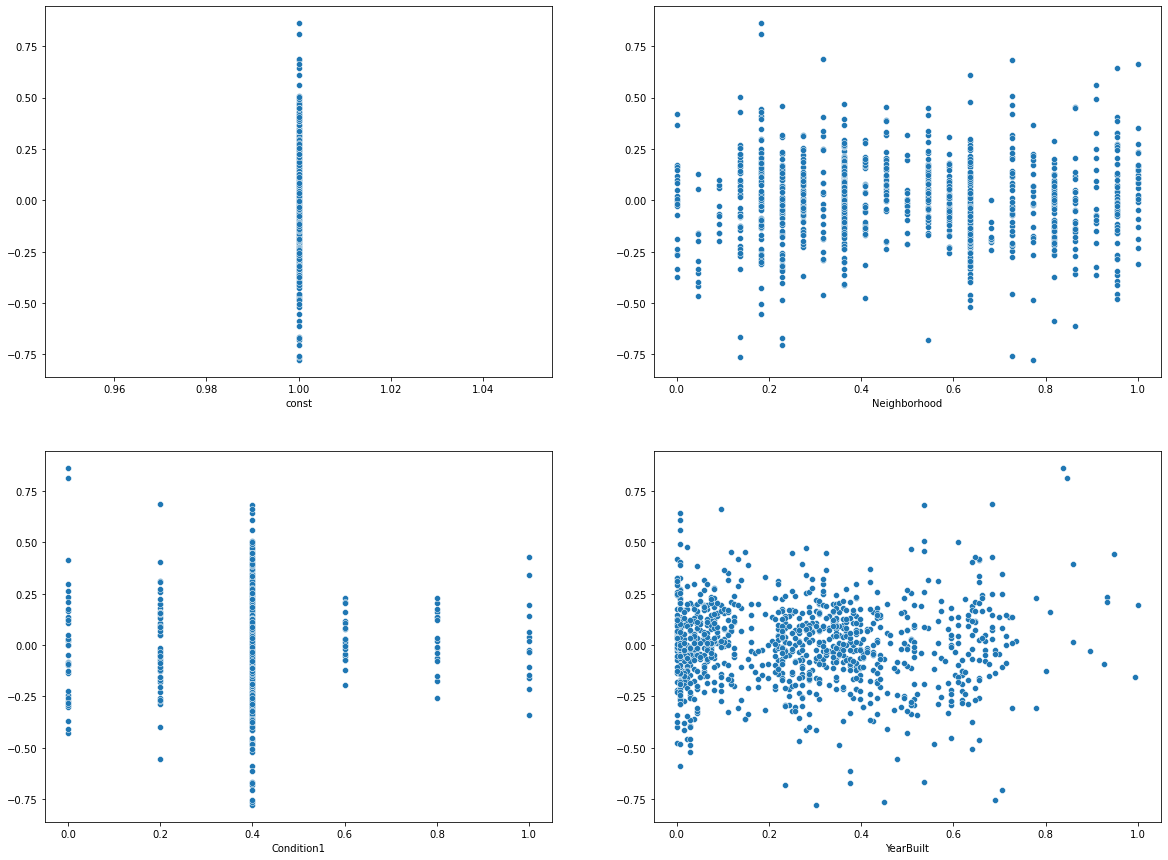

In [90]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_full4, ax.flatten()):
    sns.scatterplot(X_train_full4[variable], MLR_full_model4.resid , ax=subplot)

# display the plot
plt.show()

<a id="homo"></a>
# Homoscedasticity Test

<p style='text-indent:25em'> <strong> H<sub>o</sub>:There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:There is a heteroscedasticity present in the data </strong> </p>

In [91]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_full_model4.resid, MLR_full_model4.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
print(lzip(name, test[2:]))
print('We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.')

[('f-value', 5.90285030073726), ('p-value', 2.337581115121241e-09)]
We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.


<a id="qq"></a>
# Test of Normality by Q-Q Plot

In [92]:
hide_toggle(for_next=True)

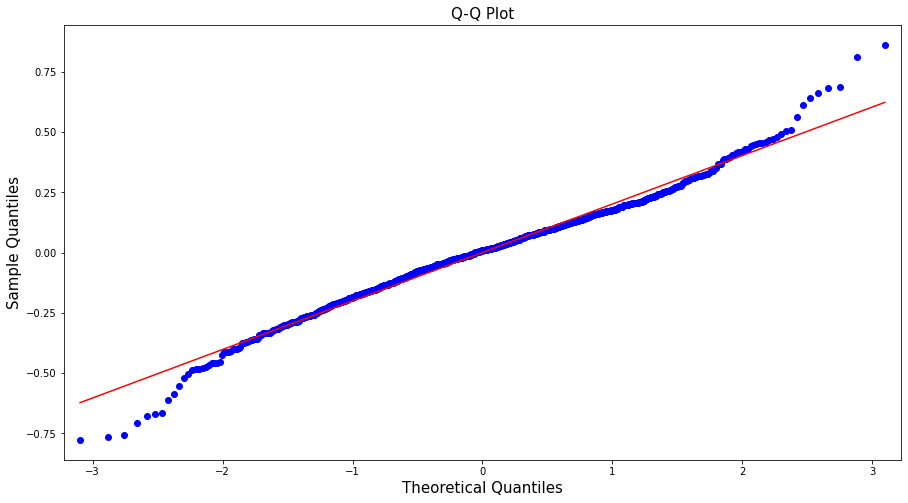

In [93]:
plt.rcParams['figure.figsize'] = [15,8]
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_full_model4.resid, line = 'r')
# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)
# display the plot
plt.show()

The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are close to the diagonal line, we conclude that the residuals do not follow a `normal distribution`.However Q-Q Plot is contervetial so for further clarity and conformation we will perform Shapiro Wilk Test 

<a id="shapiro"></a>
# Shapiro Wilk Test

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [94]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_full_model4.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
print('From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.')

Test statistic: 0.9845194220542908
P-Value: 6.096320337434236e-09
From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.


<a id="model"></a>
# Model Performance

In [95]:
train_pred = MLR_full_model4.predict(X_train_full4)

# predict the output of the target variable from the test data
test_pred = MLR_full_model4.predict(X_test_full4)

#  Mean Squared Error (MSE)

In [96]:
# calculate the MSE using the "mean_squared_error" function

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_full4, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_full4, test_pred),4)

# print the MSE for the test set 
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.0407
Mean Squared Error (MSE) on test set:  0.0497


# Root Mean Squared Error (RMSE)

In [97]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_full4, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_full4, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)


Root Mean Squared Error (RMSE) on training set:  0.2017
Root Mean Squared Error (RMSE) on test set:  0.223


# Mean Absolute Error (MAE)

In [98]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train_full4, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test_full4, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  0.1522
Mean Absolute Error (MAE) on test set:  0.1604


# Mean Absolute Percentage Error (MAPE)

In [99]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [100]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train_full4, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test_full4, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  1.267
Mean Absolute Percentage Error (MAPE) on test set:  1.3457


<a id="back"></a>
# Backward Selection

# Import the Data

In [101]:
dt=pd.read_csv('Project_train1.csv')
dt.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.750000,0.418208,0.366344,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.036765,0.098361,0.000000,0.000000,1.000000,1.000000,0.500000,0.122500,0.666667,1.000000,1.000000,0.750000,0.750000,0.250000,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.000000,1.000000,1.000000,1.000000,0.356155,0.413559,0.000000,0.577712,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.500000,1.000000,0.000000,0.200000,0.800000,0.046729,0.666667,0.500000,0.386460,0.666667,1.000000,1.000000,0.000000,0.111517,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.500000,0.666667,0.750000
1,12.109011,0.000000,0.750000,0.495064,0.391317,1.000000,1.000000,0.000000,0.333333,1.000000,0.500000,0.000000,0.500000,0.200000,1.000000,0.750000,0.600000,0.555556,0.875000,0.227941,0.524590,0.000000,0.000000,0.400000,0.300000,0.250000,0.000000,0.333333,1.000000,0.500000,0.750000,0.750000,1.000000,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.000000,1.000000,1.000000,1.000000,0.503056,0.000000,0.000000,0.470245,0.000000,0.500000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,1.000000,0.333333,0.600000,0.800000,0.289720,0.666667,0.500000,0.324401,0.666667,1.000000,1.000000,0.347725,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.363636,0.250000,0.666667,0.750000
2,12.317167,0.235294,0.750000,0.434909,0.422359,1.000000,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.051471,0.114754,0.000000,0.000000,1.000000,1.000000,0.500000,0.101250,0.666667,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.000000,1.000000,1.000000,1.000000,0.383441,0.419370,0.000000,0.593095,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.333333,1.000000,0.333333,0.600000,0.800000,0.065421,0.666667,0.500000,0.428773,0.666667,1.000000,1.000000,0.000000,0.076782,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.727273,0.500000,0.666667,0.750000
3,11.849398,0.294118,0.750000,0.388581,0.390295,1.000000,1.000000,0.333333,0.333333,1.000000,0.250000,0.000000,0.727273,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.669118,0.606557,0.000000,0.000000,0.200000,0.400000,0.250000,0.000000,0.333333,1.000000,0.250000,0.500000,1.000000,0.250000,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.000000,0.750000,1.000000,1.000000,0.399941,0.366102,0.000000,0.579157,0.333333,0.000000,0.333333,0.000000,0.375000,0.333333,0.666667,0.416667,1.000000,0.333333,0.800000,0.400000,0.074766,0.333333,0.750000,0.452750,0.666667,1.000000,1.000000,0.000000,0.063985,0.492754,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.000000,0.666667,0.000000
4,12.429216,0.235294,0.750000,0.513123,0.468761,1.000000,1.000000,0.333333,0.333333,1.000000,0.500000,0.000000,1.000000,0.400000,1.000000,0.750000,1.000000,0.777778,0.500000,0.058824,0.147541,0.000000,0.000000,1.000000,1.000000,0.500000,0.218750,0.666667,1.000000,1.000000,0.750000,0.750000,0.75000

<a id="ttb"></a>
# Train Test Split for Backward Selection

In [102]:
df_energy_cons = dt.copy()

In [103]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_energy_cons.drop('SalePrice', axis = 1)

# dependent variable
y = df_energy_cons['SalePrice']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

<a id="bs"></a>
# Backward Selection Features

In [104]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here 'best' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator=linreg, k_features = 'best', forward=False,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    2.4s finished

[2021-05-16 22:35:27] Features: 77/1 -- score: 0.8694426864020333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    2.1s finished

[2021-05-16 22:35:29] Features: 76/1 -- score: 0.872236202234491[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    2.1s finished

[2021-05-16 22:35:31] Features: 75/1 -- score: 0.8746127217737264[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished

[2021-05-16 22:36:09] Features: 49/1 -- score: 0.8868255719180962[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.0s finished

[2021-05-16 22:36:10] Features: 48/1 -- score: 0.887272939684179[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished

[2021-05-16 22:36:11] Features: 47/1 -- score: 0.8874788682311611[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.9s finished

[2021-05-16 22:36:12] Features: 46/1 --

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2021-05-16 22:36:26] Features: 21/1 -- score: 0.8927771700163986[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2021-05-16 22:36:26] Features: 20/1 -- score: 0.8926452514372096[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished

[2021-05-16 22:36:26] Features: 19/1 -- score: 0.8922720984734669[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished

[2021-05-16 22:36:26] Features: 18/1 -

In [105]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)
print(len(sfs_forward.k_feature_names_))
# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('LotArea', 'Street', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition')
22

R-Squared:  0.8928100976942641


<a id="viff"></a>
# Seeing the relationship with other variables by VIF factor 

In [106]:
dt_c=dt.copy()
# filter the numerical features in the dataset
df_numeric_features_vif = dt_c.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.750000,0.418208,0.366344,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.036765,0.098361,0.000000,0.000000,1.000000,1.000000,0.500000,0.122500,0.666667,1.000000,1.000000,0.750000,0.750000,0.250000,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.000000,1.000000,1.000000,1.000000,0.356155,0.413559,0.000000,0.577712,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.500000,1.000000,0.000000,0.200000,0.800000,0.046729,0.666667,0.500000,0.386460,0.666667,1.000000,1.000000,0.000000,0.111517,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.500000,0.666667,0.750000
1,12.109011,0.000000,0.750000,0.495064,0.391317,1.000000,1.000000,0.000000,0.333333,1.000000,0.500000,0.000000,0.500000,0.200000,1.000000,0.750000,0.600000,0.555556,0.875000,0.227941,0.524590,0.000000,0.000000,0.400000,0.300000,0.250000,0.000000,0.333333,1.000000,0.500000,0.750000,0.750000,1.000000,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.000000,1.000000,1.000000,1.000000,0.503056,0.000000,0.000000,0.470245,0.000000,0.500000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,1.000000,0.333333,0.600000,0.800000,0.289720,0.666667,0.500000,0.324401,0.666667,1.000000,1.000000,0.347725,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.363636,0.250000,0.666667,0.750000
2,12.317167,0.235294,0.750000,0.434909,0.422359,1.000000,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.051471,0.114754,0.000000,0.000000,1.000000,1.000000,0.500000,0.101250,0.666667,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.000000,1.000000,1.000000,1.000000,0.383441,0.419370,0.000000,0.593095,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.333333,1.000000,0.333333,0.600000,0.800000,0.065421,0.666667,0.500000,0.428773,0.666667,1.000000,1.000000,0.000000,0.076782,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.727273,0.500000,0.666667,0.750000
3,11.849398,0.294118,0.750000,0.388581,0.390295,1.000000,1.000000,0.333333,0.333333,1.000000,0.250000,0.000000,0.727273,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.669118,0.606557,0.000000,0.000000,0.200000,0.400000,0.250000,0.000000,0.333333,1.000000,0.250000,0.500000,1.000000,0.250000,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.000000,0.750000,1.000000,1.000000,0.399941,0.366102,0.000000,0.579157,0.333333,0.000000,0.333333,0.000000,0.375000,0.333333,0.666667,0.416667,1.000000,0.333333,0.800000,0.400000,0.074766,0.333333,0.750000,0.452750,0.666667,1.000000,1.000000,0.000000,0.063985,0.492754,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.000000,0.666667,0.000000
4,12.429216,0.235294,0.750000,0.513123,0.468761,1.000000,1.000000,0.333333,0.333333,1.000000,0.500000,0.000000,1.000000,0.400000,1.000000,0.750000,1.000000,0.777778,0.500000,0.058824,0.147541,0.000000,0.000000,1.000000,1.000000,0.500000,0.218750,0.666667,1.000000,1.000000,0.750000,0.750000,0.75000

In [107]:
hide_toggle(for_next=True)

In [108]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,TotalBsmtSF
1,inf,BsmtUnfSF
2,inf,BsmtFinSF2
3,inf,BsmtFinSF1
4,3061.460013,SalePrice
5,1397.071632,Utilities
6,514.139740,GrLivArea
7,283.551204,Street
8,237.274612,1stFlrSF
9,142.934467,MiscFeature


# After Knowing the vif factor all the insignificant variables are removed and significant ones are retained whose vif factor is less than <10

In [109]:
hide_toggle(for_next=True)

In [110]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor       Features
0     2.111924     MSSubClass
1     1.920533       LotShape
2     7.276107    LandContour
3     1.460132      LotConfig
4     1.352096      LandSlope
5     9.376254   Neighborhood
6     9.997829     Condition1
7     9.632718      YearBuilt
8     4.181937   YearRemodAdd
9     1.487018      RoofStyle
10    1.160897       RoofMatl
11    6.532602    Exterior2nd
12    6.365038     MasVnrType
13    2.123239     MasVnrArea
14    5.162046   BsmtExposure
15    9.718728   BsmtFinType1
16    4.665915     BsmtFinSF1
17    1.335613     BsmtFinSF2
18    3.569755       2ndFlrSF
19    1.113745   LowQualFinSF
20    3.701988   BsmtFullBath
21    1.213820   BsmtHalfBath
22    2.845143       HalfBath
23    2.651444     Fireplaces
24    7.699890    GarageYrBlt
25    8.288578   GarageFinish
26    1.910875     WoodDeckSF
27    1.768741    OpenPorchSF
28    1.405232  EnclosedPorch
29    1.038308      3SsnPorch
30    1.192234    ScreenPorch
31    1.093785       PoolArea
32    1.02

<a id="m1"></a>
# Machine Learning Model 1
The Predictor variable are chosen by the backward selection in this model

In [111]:
df_compensation=dt_c.copy()
df_feature = df_compensation[['LotArea', 'Street', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']]

# create dataframe of target variable
df_target = df_compensation['SalePrice']

In [112]:
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['LotArea', 'Street', 'Neighborhood', 'Condition1', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [113]:
hide_toggle(for_next=True)

In [114]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_num.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (1022, 23)
y_train_full (1022,)
X_test_full (438, 23)
y_test_full (438,)


In [115]:
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()
# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     395.0
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        22:37:00   Log-Likelihood:                 692.14
No. Observations:                1022   AIC:                            -1338.
Df Residuals:                     999   BIC:                            -1225.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0986      0.089    114.068

# Now we shall see if the variables which are selected they are significant or not by seeing their p_value

In [116]:
MLR_pvalues = pd.DataFrame(MLR_full_model.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000
LotArea,0.000000
Street,0.678547
Neighborhood,0.000000
Condition1,0.003354
OverallQual,0.000000
OverallCond,0.000000
YearBuilt,0.000030
YearRemodAdd,0.093933
BsmtQual,0.000004


In [117]:
#here we reomove the p-values of the variables whose value is greater than 0.05
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['Street', 'YearRemodAdd', 'BsmtFinType1']

<a id="m2"></a>
# Machine Learning Model 2
This Model is generated after the p-Value test thus we remove the insignificant variable and make this model

In [118]:
df_compensation=dt_c.copy()
df_feature2 = df_compensation[['LotArea', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']]

# create dataframe of target variable
df_target = df_compensation['SalePrice']

In [119]:
df_num2 = df_feature2.select_dtypes(include=[np.number])

# display numerical features
df_num2.columns

Index(['LotArea', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Functional', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [120]:
hide_toggle(for_next=True)

In [121]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full2 = df_num2.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full2 = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full2 = sm.add_constant(X_full2)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full2, X_test_full2, y_train_full2, y_test_full2 = train_test_split(X_full2, y_full2, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full2.shape)
print('y_train_full', y_train_full2.shape)

# print dimension of test set
print('X_test_full', X_test_full2.shape)
print('y_test_full', y_test_full2.shape)

X_train_full (1022, 20)
y_train_full (1022,)
X_test_full (438, 20)
y_test_full (438,)


In [122]:
MLR_full_model2 = sm.OLS(y_train_full2, X_train_full2).fit()
# print the summary output
print(MLR_full_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     455.8
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        22:37:00   Log-Likelihood:                 689.25
No. Observations:                1022   AIC:                            -1339.
Df Residuals:                    1002   BIC:                            -1240.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.0894      0.047    214.685

In [123]:
import pickle
filename = 'Final_Model.pkl'
pickle.dump(MLR_full_model2, open(filename, 'wb')) 

# Here Condition No is 41.2 so no multicollinearity 
# Durbin Watson Value is Close to 2 so no auto correlation 

<a id="linear1"></a>
# Linear Relationship between Residuals and Independent Variable

In [124]:
hide_toggle(for_next=True)

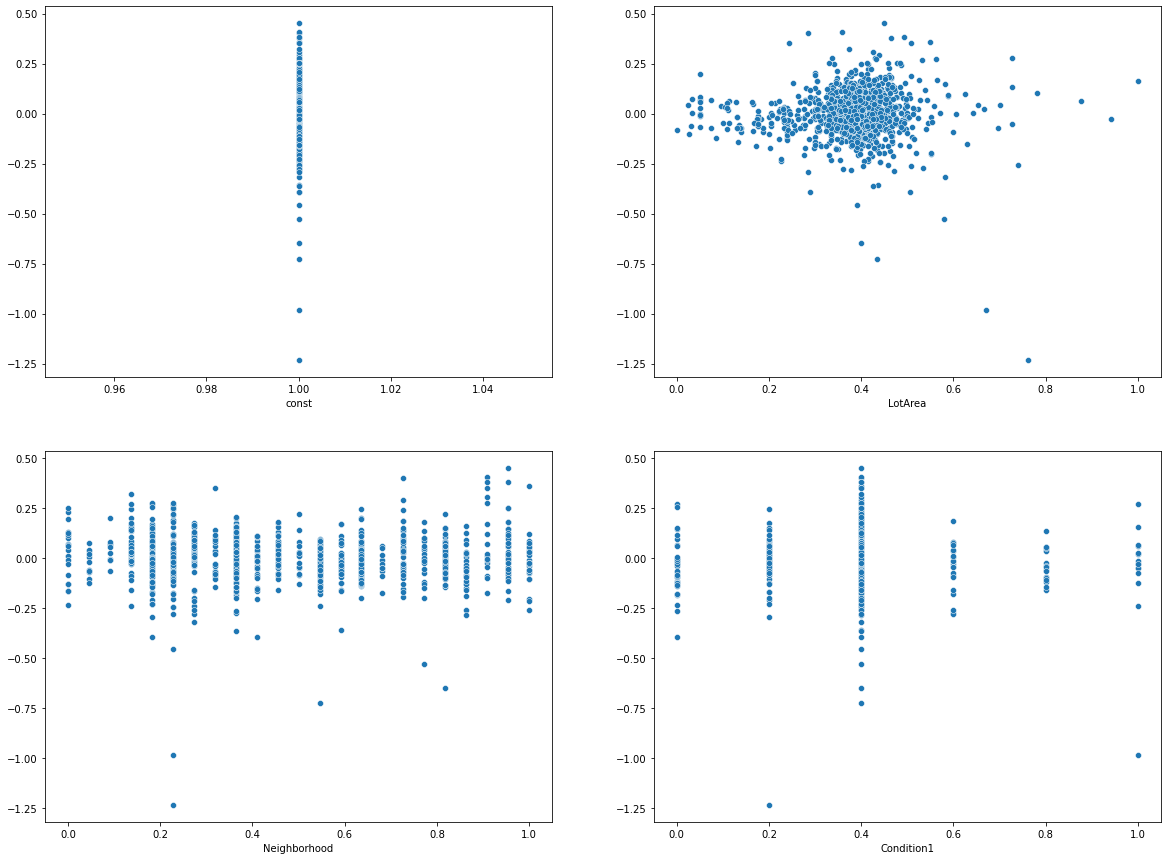

In [125]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_full2, ax.flatten()):
    sns.scatterplot(X_train_full2[variable], MLR_full_model2.resid , ax=subplot)

# display the plot
plt.show()

<a id="homo1"></a>
# Homoscedasticity Test

<p style='text-indent:25em'> <strong> H<sub>o</sub>:There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:There is a heteroscedasticity present in the data </strong> </p>

In [126]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_full_model2.resid, MLR_full_model2.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
print(lzip(name, test[2:]))
print('We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.')

[('f-value', 7.119143181505502), ('p-value', 3.568412480904691e-18)]
We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.


<a id="qq1"></a>
#  Test of Normality by Q-Q Plot

In [127]:
hide_toggle(for_next=True)

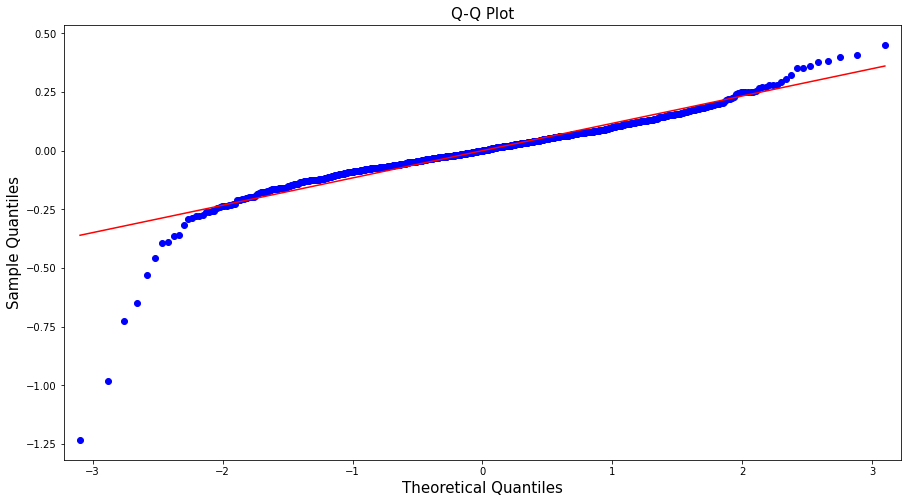

In [128]:
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_full_model2.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are close to the diagonal line, we conclude that the residuals do not follow a `normal distribution`.However Q-Q Plot is contervetial so for further clarity and conformation we will perform Shapiro Wilk Test 

<a id="shapiro1"></a>
# Shapiro Wilk Test

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [129]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_full_model2.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
print('From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.')

Test statistic: 0.8877646923065186
P-Value: 1.379780431510539e-26
From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.


<a id="model1"></a>
# Model Performance

In [130]:
train_pred = MLR_full_model2.predict(X_train_full2)

# predict the output of the target variable from the test data
test_pred = MLR_full_model2.predict(X_test_full2)

# Mean Squared Error (MSE)

In [131]:
# calculate the MSE using the "mean_squared_error" function

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_full2, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_full2, test_pred),4)

# print the MSE for the test set 
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.0152
Mean Squared Error (MSE) on test set:  0.0183


# Root Mean Squared Error (RMSE)

In [132]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_full2, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_full2, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.1233
Root Mean Squared Error (RMSE) on test set:  0.1354


# Mean Absolute Error (MAE)

In [133]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train_full2, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test_full2, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  0.0848
Mean Absolute Error (MAE) on test set:  0.0975


# Mean Absolute Percentage Error (MAPE)

In [134]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [135]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train_full2, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test_full2, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  0.7055
Mean Absolute Percentage Error (MAPE) on test set:  0.8197


<a id="rfe"></a>
# Recursive Feature Elimination

# Import Data

In [136]:
dt=pd.read_csv('Project_train1.csv')
dt.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.750000,0.418208,0.366344,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.036765,0.098361,0.000000,0.000000,1.000000,1.000000,0.500000,0.122500,0.666667,1.000000,1.000000,0.750000,0.750000,0.250000,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.000000,1.000000,1.000000,1.000000,0.356155,0.413559,0.000000,0.577712,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.500000,1.000000,0.000000,0.200000,0.800000,0.046729,0.666667,0.500000,0.386460,0.666667,1.000000,1.000000,0.000000,0.111517,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.500000,0.666667,0.750000
1,12.109011,0.000000,0.750000,0.495064,0.391317,1.000000,1.000000,0.000000,0.333333,1.000000,0.500000,0.000000,0.500000,0.200000,1.000000,0.750000,0.600000,0.555556,0.875000,0.227941,0.524590,0.000000,0.000000,0.400000,0.300000,0.250000,0.000000,0.333333,1.000000,0.500000,0.750000,0.750000,1.000000,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.000000,1.000000,1.000000,1.000000,0.503056,0.000000,0.000000,0.470245,0.000000,0.500000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,1.000000,0.333333,0.600000,0.800000,0.289720,0.666667,0.500000,0.324401,0.666667,1.000000,1.000000,0.347725,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.363636,0.250000,0.666667,0.750000
2,12.317167,0.235294,0.750000,0.434909,0.422359,1.000000,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.051471,0.114754,0.000000,0.000000,1.000000,1.000000,0.500000,0.101250,0.666667,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.000000,1.000000,1.000000,1.000000,0.383441,0.419370,0.000000,0.593095,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.333333,1.000000,0.333333,0.600000,0.800000,0.065421,0.666667,0.500000,0.428773,0.666667,1.000000,1.000000,0.000000,0.076782,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.727273,0.500000,0.666667,0.750000
3,11.849398,0.294118,0.750000,0.388581,0.390295,1.000000,1.000000,0.333333,0.333333,1.000000,0.250000,0.000000,0.727273,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.669118,0.606557,0.000000,0.000000,0.200000,0.400000,0.250000,0.000000,0.333333,1.000000,0.250000,0.500000,1.000000,0.250000,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.000000,0.750000,1.000000,1.000000,0.399941,0.366102,0.000000,0.579157,0.333333,0.000000,0.333333,0.000000,0.375000,0.333333,0.666667,0.416667,1.000000,0.333333,0.800000,0.400000,0.074766,0.333333,0.750000,0.452750,0.666667,1.000000,1.000000,0.000000,0.063985,0.492754,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.000000,0.666667,0.000000
4,12.429216,0.235294,0.750000,0.513123,0.468761,1.000000,1.000000,0.333333,0.333333,1.000000,0.500000,0.000000,1.000000,0.400000,1.000000,0.750000,1.000000,0.777778,0.500000,0.058824,0.147541,0.000000,0.000000,1.000000,1.000000,0.500000,0.218750,0.666667,1.000000,1.000000,0.750000,0.750000,0.75000

In [137]:
df_energy_cons = dt.copy()

In [138]:
df_energy_cons.shape

(1460, 79)

<a id="f_rfe"></a>
# Features selected after Recursive Feature Elimination

In [139]:
hide_toggle(for_next=True)

In [140]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_energy_cons.drop('SalePrice', axis = 1)
 
# consider the dependent variable
y = df_energy_cons['SalePrice']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select =80 )

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [141]:
new_X_train = X_train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition']]
# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)
# check the score
linreg.score(new_X_train, y_train)

0.9094769785210992

<a id="vif_fact"></a>
# Vif Factor

In [142]:
dt_c=dt.copy()
# filter the numerical features in the dataset
df_numeric_features_vif = dt_c.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.750000,0.418208,0.366344,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.036765,0.098361,0.000000,0.000000,1.000000,1.000000,0.500000,0.122500,0.666667,1.000000,1.000000,0.750000,0.750000,0.250000,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.000000,1.000000,1.000000,1.000000,0.356155,0.413559,0.000000,0.577712,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.500000,1.000000,0.000000,0.200000,0.800000,0.046729,0.666667,0.500000,0.386460,0.666667,1.000000,1.000000,0.000000,0.111517,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.500000,0.666667,0.750000
1,12.109011,0.000000,0.750000,0.495064,0.391317,1.000000,1.000000,0.000000,0.333333,1.000000,0.500000,0.000000,0.500000,0.200000,1.000000,0.750000,0.600000,0.555556,0.875000,0.227941,0.524590,0.000000,0.000000,0.400000,0.300000,0.250000,0.000000,0.333333,1.000000,0.500000,0.750000,0.750000,1.000000,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.000000,1.000000,1.000000,1.000000,0.503056,0.000000,0.000000,0.470245,0.000000,0.500000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,1.000000,0.333333,0.600000,0.800000,0.289720,0.666667,0.500000,0.324401,0.666667,1.000000,1.000000,0.347725,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.363636,0.250000,0.666667,0.750000
2,12.317167,0.235294,0.750000,0.434909,0.422359,1.000000,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.051471,0.114754,0.000000,0.000000,1.000000,1.000000,0.500000,0.101250,0.666667,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.000000,1.000000,1.000000,1.000000,0.383441,0.419370,0.000000,0.593095,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.333333,1.000000,0.333333,0.600000,0.800000,0.065421,0.666667,0.500000,0.428773,0.666667,1.000000,1.000000,0.000000,0.076782,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.727273,0.500000,0.666667,0.750000
3,11.849398,0.294118,0.750000,0.388581,0.390295,1.000000,1.000000,0.333333,0.333333,1.000000,0.250000,0.000000,0.727273,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.669118,0.606557,0.000000,0.000000,0.200000,0.400000,0.250000,0.000000,0.333333,1.000000,0.250000,0.500000,1.000000,0.250000,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.000000,0.750000,1.000000,1.000000,0.399941,0.366102,0.000000,0.579157,0.333333,0.000000,0.333333,0.000000,0.375000,0.333333,0.666667,0.416667,1.000000,0.333333,0.800000,0.400000,0.074766,0.333333,0.750000,0.452750,0.666667,1.000000,1.000000,0.000000,0.063985,0.492754,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.000000,0.666667,0.000000
4,12.429216,0.235294,0.750000,0.513123,0.468761,1.000000,1.000000,0.333333,0.333333,1.000000,0.500000,0.000000,1.000000,0.400000,1.000000,0.750000,1.000000,0.777778,0.500000,0.058824,0.147541,0.000000,0.000000,1.000000,1.000000,0.500000,0.218750,0.666667,1.000000,1.000000,0.750000,0.750000,0.75000

#  Here we get to know the vif factor with respect to each and every variable

In [143]:
hide_toggle(for_next=True)

In [144]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,TotalBsmtSF
1,inf,BsmtUnfSF
2,inf,BsmtFinSF2
3,inf,BsmtFinSF1
4,3061.460013,SalePrice
5,1397.071632,Utilities
6,514.139740,GrLivArea
7,283.551204,Street
8,237.274612,1stFlrSF
9,142.934467,MiscFeature


# All the variables with vif factors less than 10 are selected

In [145]:
hide_toggle(for_next=True)

In [146]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor       Features
0     2.111924     MSSubClass
1     1.920533       LotShape
2     7.276107    LandContour
3     1.460132      LotConfig
4     1.352096      LandSlope
5     9.376254   Neighborhood
6     9.997829     Condition1
7     9.632718      YearBuilt
8     4.181937   YearRemodAdd
9     1.487018      RoofStyle
10    1.160897       RoofMatl
11    6.532602    Exterior2nd
12    6.365038     MasVnrType
13    2.123239     MasVnrArea
14    5.162046   BsmtExposure
15    9.718728   BsmtFinType1
16    4.665915     BsmtFinSF1
17    1.335613     BsmtFinSF2
18    3.569755       2ndFlrSF
19    1.113745   LowQualFinSF
20    3.701988   BsmtFullBath
21    1.213820   BsmtHalfBath
22    2.845143       HalfBath
23    2.651444     Fireplaces
24    7.699890    GarageYrBlt
25    8.288578   GarageFinish
26    1.910875     WoodDeckSF
27    1.768741    OpenPorchSF
28    1.405232  EnclosedPorch
29    1.038308      3SsnPorch
30    1.192234    ScreenPorch
31    1.093785       PoolArea
32    1.02

<a id="ml11"></a>
# Machine Learning Model 1
The Predictor variable are chosen by the Recursive Feature Elimination in this model

In [147]:
df_compensation=dt_c.copy()
df_feature = df_compensation[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition']]

# create dataframe of target variable
df_target = df_compensation['SalePrice']

In [148]:
df_num = df_feature.select_dtypes(include=[np.number])

# display numerical features
df_num.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [149]:
hide_toggle(for_next=True)

In [150]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_num.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (1022, 79)
y_train_full (1022,)
X_test_full (438, 79)
y_test_full (438,)


In [151]:
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     126.9
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        22:37:34   Log-Likelihood:                 772.59
No. Observations:                1022   AIC:                            -1389.
Df Residuals:                     944   BIC:                            -1005.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3931      0.183     51.392

strong multicollinearity problems or that the design matrix is singular.


# Now we shall see if the variables which are selected if they are significant or not by seeing their p_value

In [152]:
MLR_pvalues = pd.DataFrame(MLR_full_model.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000
MSSubClass,0.027735
MSZoning,0.321073
LotFrontage,0.119721
LotArea,0.000069
Street,0.855835
Alley,0.450586
LotShape,0.706125
LandContour,0.001033
Utilities,0.003015


In [153]:
#here we reomove the p-values of the variables whose value is greater than 0.05
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LotShape',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'MasVnrArea',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType']

<a id="ml21"></a>
# Machine Learning Model 2
This Model is generated after the p-Value test in this  we remove the insignificant variable and make this model 

In [154]:
df_compensation=dt_c.copy()
df_feature2 = df_compensation.drop(['MSZoning','SalePrice', 'LotFrontage', 'Street','Alley','LotShape','LotConfig','LandSlope', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond','PavedDrive', '3SsnPorch', 'PoolArea', 'Fence', 'MiscFeature','MiscVal','MoSold','YrSold','SaleType'],axis=1)

# create dataframe of target variable
df_target = df_compensation['SalePrice']

In [155]:
df_num2 = df_feature2.select_dtypes(include=[np.number])

# display numerical features
df_num2.columns

Index(['MSSubClass', 'LotArea', 'LandContour', 'Utilities', 'Neighborhood',
       'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'KitchenQual', 'Functional', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [156]:
hide_toggle(for_next=True)

In [157]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full2 = df_num2.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full2 = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full2 = sm.add_constant(X_full2)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full2, X_test_full2, y_train_full2, y_test_full2 = train_test_split(X_full2, y_full2, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full2.shape)
print('y_train_full', y_train_full2.shape)

# print dimension of test set
print('X_test_full', X_test_full2.shape)
print('y_test_full', y_test_full2.shape)

X_train_full (1022, 34)
y_train_full (1022,)
X_test_full (438, 34)
y_test_full (438,)


In [158]:
MLR_full_model2 = sm.OLS(y_train_full2, X_train_full2).fit()

# print the summary output
print(MLR_full_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     284.1
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        22:37:34   Log-Likelihood:                 732.23
No. Observations:                1022   AIC:                            -1396.
Df Residuals:                     988   BIC:                            -1229.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3304      0.140     66.786

In [159]:
MLR_pvalues = pd.DataFrame(MLR_full_model2.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000
MSSubClass,0.007625
LotArea,0.000001
LandContour,0.000442
Utilities,0.003617
Neighborhood,0.000000
Condition1,0.001024
Condition2,0.001246
OverallQual,0.000000
OverallCond,0.000000


In [160]:
#here we reomove the p-values of the variables whose value is greater than 0.05
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['ExterQual', 'TotalBsmtSF', 'FullBath', 'EnclosedPorch']

<a id="ml31"></a>
# Machine Learning Model 3
This Model is generated after the p-Value test thus we remove the insignificant variable and make this model

In [161]:
df_compensation=dt_c.copy()
df_feature3 = df_compensation.drop(['ExterQual', 'TotalBsmtSF', 'FullBath', 'EnclosedPorch','MSZoning','SalePrice', 'LotFrontage', 'Street','Alley','LotShape','LotConfig','LandSlope', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond','PavedDrive', '3SsnPorch', 'PoolArea', 'Fence', 'MiscFeature','MiscVal','MoSold','YrSold','SaleType'],axis=1)

# create dataframe of target variable
df_target = df_compensation['SalePrice']

In [162]:
df_num3 = df_feature3.select_dtypes(include=[np.number])

# display numerical features
df_num3.columns

Index(['MSSubClass', 'LotArea', 'LandContour', 'Utilities', 'Neighborhood',
       'Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Functional', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [163]:
hide_toggle(for_next=True)

In [164]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full3 = df_num3.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full3 = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full3 = sm.add_constant(X_full3)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full3, X_test_full3, y_train_full3, y_test_full3 = train_test_split(X_full3, y_full3, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full3.shape)
print('y_train_full', y_train_full3.shape)

# print dimension of test set
print('X_test_full', X_test_full3.shape)
print('y_test_full', y_test_full3.shape)

X_train_full (1022, 30)
y_train_full (1022,)
X_test_full (438, 30)
y_test_full (438,)


In [165]:
MLR_full_model3 = sm.OLS(y_train_full3, X_train_full3).fit()

# print the summary output
print(MLR_full_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     321.4
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        22:37:35   Log-Likelihood:                 727.61
No. Observations:                1022   AIC:                            -1395.
Df Residuals:                     992   BIC:                            -1247.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3599      0.139     67.242

# Since the Condition Number is 158 which detects slight multi collinearity therefore we will apply vif to remove the variable which show high multicollinearity 

In [166]:
dt_c=dt.copy()
# filter the numerical features in the dataset
df_numeric_features_vif =df_compensation.drop(['ExterQual', 'TotalBsmtSF', 'FullBath', 'EnclosedPorch','MSZoning','SalePrice', 'LotFrontage', 'Street','Alley','LotShape','LotConfig','LandSlope', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond','PavedDrive', '3SsnPorch', 'PoolArea', 'Fence', 'MiscFeature','MiscVal','MoSold','YrSold','SaleType'],axis=1)


# display the first five observations
df_numeric_features_vif.head(2)

,MSSubClass,LotArea,LandContour,Utilities,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtUnfSF,HeatingQC,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Functional,GarageCars,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleCondition
0,0.235294,0.366344,0.333333,1.000000,0.636364,0.400000,1.000000,0.666667,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,0.750000,0.750000,0.250000,0.064212,1.000000,0.356155,0.577712,0.333333,0.666667,1.000000,0.500000,0.000000,0.111517,0.000000,0.750000
1,0.000000,0.391317,0.333333,1.000000,0.500000,0.200000,1.000000,0.555556,0.875000,0.000000,0.400000,0.300000,1.000000,0.500000,0.750000,0.750000,1.000000,0.121575,1.000000,0.503056,0.470245,0.000000,0.333333,1.000000,0.500000,0.347725,0.000000,0.000000,0.750000


#  Here we get to know the vif factor with respect to each and every variable

In [167]:
hide_toggle(for_next=True)

In [168]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,245.249269,Utilities
1,95.682197,Condition2
2,75.782778,BsmtCond
3,55.063317,GrLivArea
4,52.689381,OverallQual
5,37.313076,1stFlrSF
6,36.950504,Functional
7,36.848647,BsmtQual
8,35.579546,Exterior1st
9,35.039140,ExterCond


# All the variables with vif factors less than 10 are selected 

In [169]:
hide_toggle(for_next=True)

In [170]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor      Features
0     1.732215    MSSubClass
1     6.365324   LandContour
2     6.211380  Neighborhood
3     9.227348    Condition1
4     8.845036   OverallCond
5     1.079536      RoofMatl
6     5.375233   Exterior2nd
7     4.388677  BsmtExposure
8     3.518489     BsmtUnfSF
9     2.400530  BsmtFullBath
10    1.768076    WoodDeckSF
11    1.638153   OpenPorchSF
12    1.111266   ScreenPorch


<a id="ml41"></a>
# Machine Learning Model 4
This Model is generated after doing the vif factor test thus we remove the variable whose vif factor is greater than 10  and make this model

In [171]:
hide_toggle(for_next=True)

In [172]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full4 = df_numeric_features_vif.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full4 = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full4 = sm.add_constant(X_full4)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full4, X_test_full4, y_train_full4, y_test_full4 = train_test_split(X_full4, y_full4, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full4.shape)
print('y_train_full', y_train_full4.shape)

# print dimension of test set
print('X_test_full', X_test_full4.shape)
print('y_test_full', y_test_full4.shape)

X_train_full (1022, 14)
y_train_full (1022,)
X_test_full (438, 14)
y_test_full (438,)


In [173]:
MLR_full_model4 = sm.OLS(y_train_full4, X_train_full4).fit()
# print the summary output
print(MLR_full_model4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sun, 16 May 2021   Prob (F-statistic):          2.06e-234
Time:                        22:37:36   Log-Likelihood:                 103.52
No. Observations:                1022   AIC:                            -179.0
Df Residuals:                    1008   BIC:                            -110.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.0413      0.049    226.968   

#  Here Condition No is 17.1 so no multicollinearity 
# Durbin Watson Value is Close to 2 so no auto correlation 

<a id="linear2"></a>
# Linear Relationship between Residuals and Independent Variable

In [174]:
hide_toggle(for_next=True)

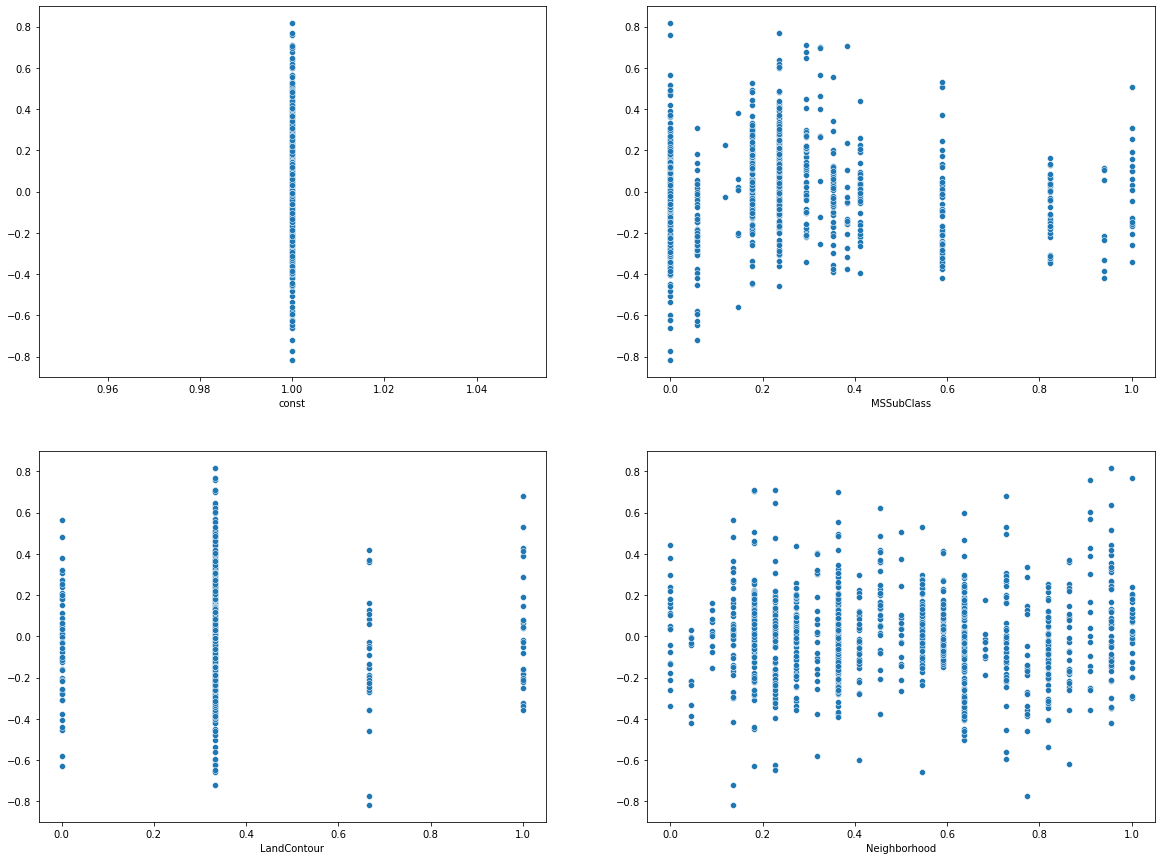

In [175]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_full4, ax.flatten()):
    sns.scatterplot(X_train_full4[variable], MLR_full_model4.resid , ax=subplot)

# display the plot
plt.show()

<a id="homo2"></a>
# Homoscedasticity Test

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [176]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_full_model4.resid, MLR_full_model4.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
print(lzip(name, test[2:]))
print('We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.')

[('f-value', 2.8381602609429915), ('p-value', 0.0005079696172002246)]
We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.


<a id="qq2"></a>
#  Test of Normality by Q-Q Plot

In [177]:
hide_toggle(for_next=True)

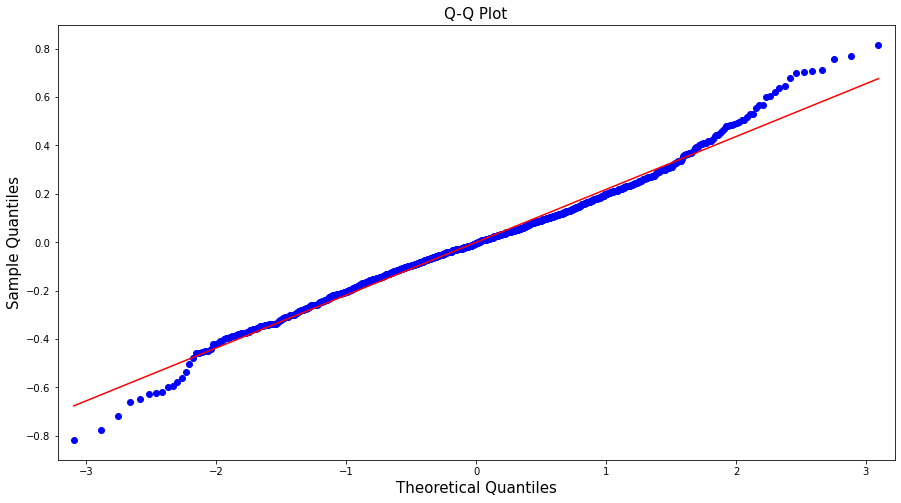

In [178]:
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_full_model4.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are close to the diagonal line, we conclude that the residuals do not follow a `normal distribution`.However Q-Q Plot is contervetial so for further clarity and conformation we will perform Shapiro Wilk Test 

<a id="shapiro2"></a>
# Shapiro Wilk Test

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [179]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(MLR_full_model4.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
print('From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.')

Test statistic: 0.987288236618042
P-Value: 9.514369025964697e-08
From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.


<a id="model2"></a>
# Model Performance

In [180]:
train_pred = MLR_full_model4.predict(X_train_full4)

# predict the output of the target variable from the test data
test_pred = MLR_full_model4.predict(X_test_full4)

# Mean Squared Error (MSE)

In [181]:
# calculate the MSE using the "mean_squared_error" function

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_full4, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_full4, test_pred),4)

# print the MSE for the test set 
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.0478
Mean Squared Error (MSE) on test set:  0.0614


# Root Mean Squared Error (RMSE) 

In [182]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_full4, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_full4, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.2187
Root Mean Squared Error (RMSE) on test set:  0.2478


# Mean Absolute Error (MAE)

In [183]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train_full4, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test_full4, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  0.1652
Mean Absolute Error (MAE) on test set:  0.1802


# Mean Absolute Percentage Error (MAPE)

In [184]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [185]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train_full4, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test_full4, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  1.3725
Mean Absolute Percentage Error (MAPE) on test set:  1.5102


<a id="d"></a>
# Model Testing

<a id="best"></a>
# So the Best Model we get is from Backward Selection 
Since this was the only model which gave us high R^2 i.e. is off 0.89 value with low Condition No which is 41 and Durbin Wattson Test value was off 1.99~2 so no AutoCorrelation 

In [186]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [187]:
dt=pd.read_csv('Project_train1.csv')
dt.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.235294,0.750000,0.418208,0.366344,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.036765,0.098361,0.000000,0.000000,1.000000,1.000000,0.500000,0.122500,0.666667,1.000000,1.000000,0.750000,0.750000,0.250000,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.000000,1.000000,1.000000,1.000000,0.356155,0.413559,0.000000,0.577712,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.500000,1.000000,0.000000,0.200000,0.800000,0.046729,0.666667,0.500000,0.386460,0.666667,1.000000,1.000000,0.000000,0.111517,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.500000,0.666667,0.750000
1,12.109011,0.000000,0.750000,0.495064,0.391317,1.000000,1.000000,0.000000,0.333333,1.000000,0.500000,0.000000,0.500000,0.200000,1.000000,0.750000,0.600000,0.555556,0.875000,0.227941,0.524590,0.000000,0.000000,0.400000,0.300000,0.250000,0.000000,0.333333,1.000000,0.500000,0.750000,0.750000,1.000000,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.000000,1.000000,1.000000,1.000000,0.503056,0.000000,0.000000,0.470245,0.000000,0.500000,0.666667,0.000000,0.375000,0.333333,0.333333,0.333333,1.000000,0.333333,0.600000,0.800000,0.289720,0.666667,0.500000,0.324401,0.666667,1.000000,1.000000,0.347725,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.363636,0.250000,0.666667,0.750000
2,12.317167,0.235294,0.750000,0.434909,0.422359,1.000000,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.636364,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.051471,0.114754,0.000000,0.000000,1.000000,1.000000,0.500000,0.101250,0.666667,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.000000,1.000000,1.000000,1.000000,0.383441,0.419370,0.000000,0.593095,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,0.666667,0.333333,1.000000,0.333333,0.600000,0.800000,0.065421,0.666667,0.500000,0.428773,0.666667,1.000000,1.000000,0.000000,0.076782,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.727273,0.500000,0.666667,0.750000
3,11.849398,0.294118,0.750000,0.388581,0.390295,1.000000,1.000000,0.333333,0.333333,1.000000,0.250000,0.000000,0.727273,0.400000,1.000000,0.750000,1.000000,0.666667,0.500000,0.669118,0.606557,0.000000,0.000000,0.200000,0.400000,0.250000,0.000000,0.333333,1.000000,0.250000,0.500000,1.000000,0.250000,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.000000,0.750000,1.000000,1.000000,0.399941,0.366102,0.000000,0.579157,0.333333,0.000000,0.333333,0.000000,0.375000,0.333333,0.666667,0.416667,1.000000,0.333333,0.800000,0.400000,0.074766,0.333333,0.750000,0.452750,0.666667,1.000000,1.000000,0.000000,0.063985,0.492754,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.090909,0.000000,0.666667,0.000000
4,12.429216,0.235294,0.750000,0.513123,0.468761,1.000000,1.000000,0.333333,0.333333,1.000000,0.500000,0.000000,1.000000,0.400000,1.000000,0.750000,1.000000,0.777778,0.500000,0.058824,0.147541,0.000000,0.000000,1.000000,1.000000,0.500000,0.218750,0.666667,1.000000,1.000000,0.750000,0.750000,0.75000

In [188]:
dt.shape

(1460, 79)

In [189]:
dt.dtypes

SalePrice        float64
MSSubClass       float64
MSZoning         float64
LotFrontage      float64
LotArea          float64
Street           float64
Alley            float64
LotShape         float64
LandContour      float64
Utilities        float64
LotConfig        float64
LandSlope        float64
Neighborhood     float64
Condition1       float64
Condition2       float64
BldgType         float64
HouseStyle       float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
RoofStyle        float64
RoofMatl         float64
Exterior1st      float64
Exterior2nd      float64
MasVnrType       float64
MasVnrArea       float64
ExterQual        float64
ExterCond        float64
Foundation       float64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinSF1       float64
BsmtFinType2     float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating          float64


# Best Model made by Backward Slection

In [190]:
dt_c=dt.copy()
df_compensation=dt_c.copy()
df_feature2 = df_compensation[['LotArea', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']]

# create dataframe of target variable
df_target = df_compensation['SalePrice']

In [191]:
df_num2 = df_feature2.select_dtypes(include=[np.number])

# display numerical features
df_num2.columns

Index(['LotArea', 'Neighborhood', 'Condition1', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Functional', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [192]:
hide_toggle(for_next=True)

In [193]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X = df_num2.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y= df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X= sm.add_constant(X_full2)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test_full', X_test.shape)
print('y_test_full', y_test.shape)

X_train (1022, 34)
y_train (1022,)
X_test_full (438, 34)
y_test_full (438,)



<a id="gen_func"></a>
# Creating generalized functions to calculate various metrics for models

# 1.Creating a generalized function to calculate the RMSE for train and test set.

In [194]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [195]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

# 2.Creating a generalized function to calculate the R-Squared and Adjusted R- Squared

In [196]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

# 3.Creating a generalized function to create a dataframe containing the scores from all the models

In [197]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE',])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio,  
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

# 4.Creating a generalized function to plot a barchart for the coefficients

In [198]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

<a id="mlr"></a>
# Multiple Linear Regression (OLS)
Building a MLR model on a training dataset.

In [199]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train, y_train)

0.90467001728897

In [200]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.1182
RMSE on test set:  0.1443
Difference between RMSE on train and test set:  0.026100000000000012


 RMSE on the training set is 0.1182, while on the test set it is 0.1444. We can see that there is a small difference in the RMSE of the train and the test set. This implies that our model has not overfitted nor underfitted on the train set.

In [201]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300


<a id="cross"></a>
# Cross Validation

# K-Fold Cross Validation

In [202]:
# n_splits: specify the number of k folds
kf = KFold(n_splits = 5)

In [203]:
# create a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                   # fit the model
    return model.score(X_test_k, y_test_k)                            # return the R-squared value

In [204]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [205]:
hide_toggle(for_next=True)

In [206]:
# create an empty list to store the scores
scores = []

# kf.split() splits the indices of X_train into train_index and test_index
# further dividing the X_train and y_train sets into train and test sets for cross validation
# Remember: Cross validation works on training set not on test set
# use '\' for stacking the code 
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
   
    # call the function 'get_scores()' and append the scores in the list 'scores'
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.8940599119028501, 0.9031581574506007, 0.8184669917418665, 0.8742839743679409, 0.8861793021222113]

Minimum score obtained:  0.8185
Maximum score obtained:  0.9032
Average score obtained:  0.8752


<a id="kfold"></a>
# K-Fold Cross Validation using cross_val_score() 

In [207]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [208]:
hide_toggle(for_next=True)

In [209]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))
print('We can see that we got the same scores from KFold() and cross_val_score()')

All scores:  [0.89405991 0.90315816 0.81846699 0.87428397 0.8861793 ]

Minimum score obtained:  0.8185
Maximum score obtained:  0.9032
Average score obtained:  0.8752
We can see that we got the same scores from KFold() and cross_val_score()


<a id="grad"></a>
# Gradient Descent

# Stochastic Gradient Descent

Building MLR model using SGD method.

In [210]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 0.3133
RMSE on test set: 0.3424


Visualizing the change in values of coefficients obtained from MLR_model (using OLS) and linreg_with_SGD

In [211]:
hide_toggle(for_next=True)

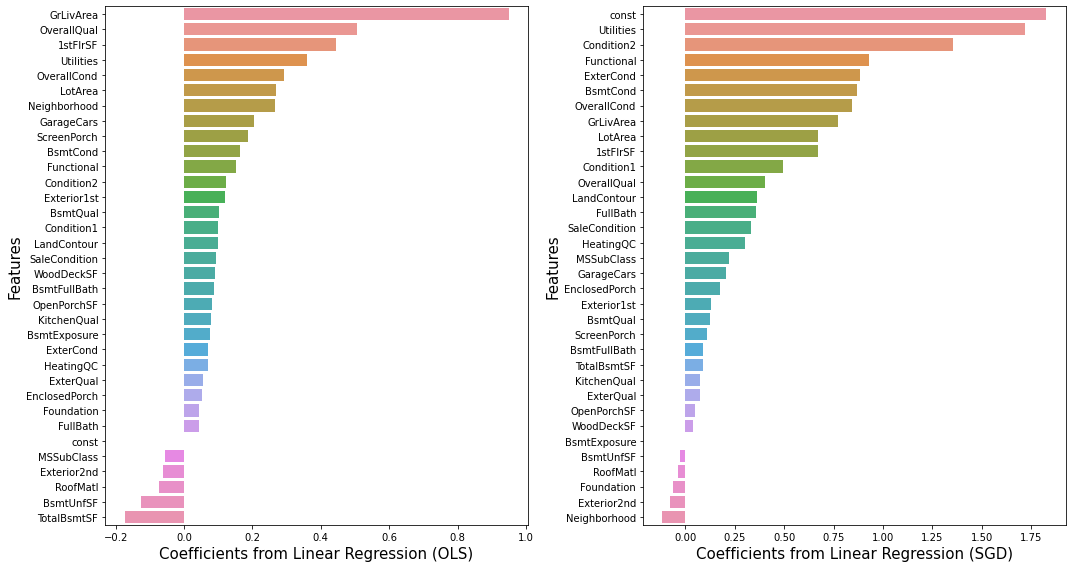

In [212]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

The coefficients obtained from SGD have smaller values as compared to the coefficients obtained from linear regression using OLS.

In [213]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300
1,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400



<a id="ridge"></a>
# Ridge Regression 

Most of the times our data can show multicollinearity in the variables. To analyze such data we can use Ridge Regression. It uses the L2 norm for regularization.



In [214]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.1267


After applying the ridge regression with alpha equal to one, we get 0.1267 as the RMSE value.

In [215]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300
1,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400
2,Ridge Regression (with alpha = 1),1,-,0.897982,0.894467,0.126700


Building regression model using Ridge Regression for alpha = 2.

In [216]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.1276


In [217]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 2)', model = ridge, alpha = 2)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300
1,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400
2,Ridge Regression (with alpha = 1),1,-,0.897982,0.894467,0.126700
3,Ridge Regression (with alpha = 2),2,-,0.896026,0.892445,0.127600


Visualizing the change in values of coefficients obtained from MLR_model (using OLS) and ridge_model

In [218]:
hide_toggle(for_next=True)

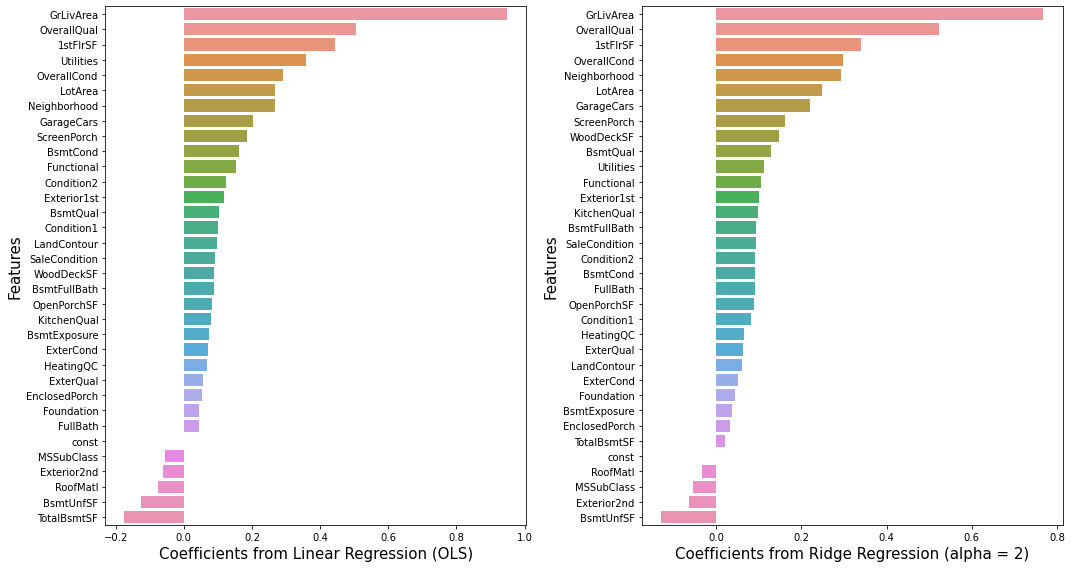

In [219]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 2)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

The coefficients obtained from ridge regression have smaller values as compared to the coefficients obtained from linear regression using OLS.

<a id="lasso"></a>
#  Lasso Regression

In [220]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.1909


After applying the lasso regression with alpha equal to 0.01, the RMSE value is 0.1909.

Visualizing the change in values of coefficients obtained from MLR_model (using OLS) and lasso_model


In [221]:
hide_toggle(for_next=True)

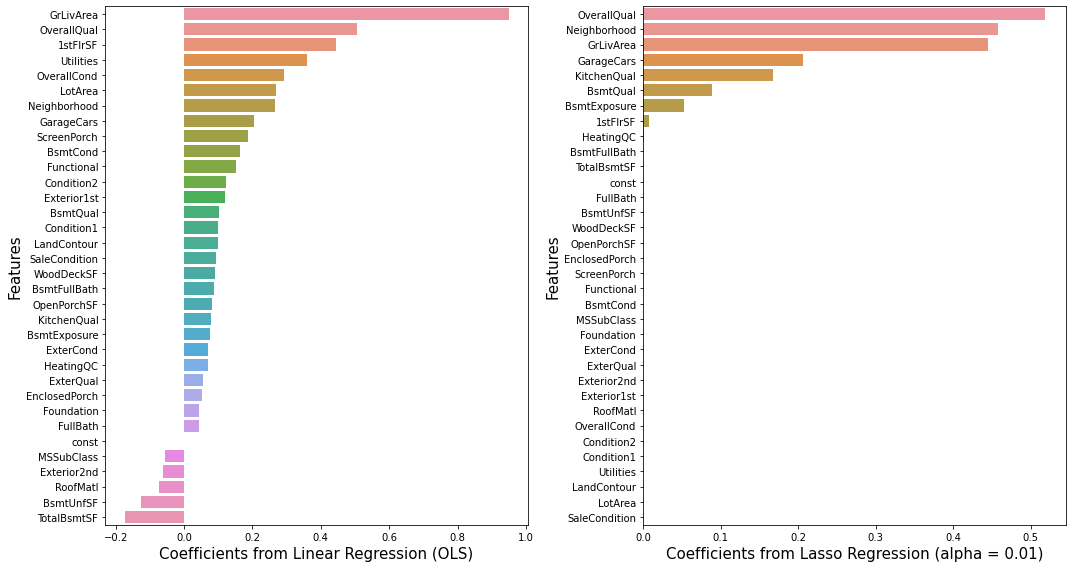

In [222]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

Let us print the list of variables with zero coefficient.

In [223]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})
# print the variables having the coefficient value equal to zero
# 'to_list()' converts the output to the list type
print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['const',
 'MSSubClass',
 'LotArea',
 'LandContour',
 'Utilities',
 'Condition1',
 'Condition2',
 'OverallCond',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtCond',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'FullBath',
 'Functional',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SaleCondition']

In [224]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300
1,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400
2,Ridge Regression (with alpha = 1),1,-,0.897982,0.894467,0.126700
3,Ridge Regression (with alpha = 2),2,-,0.896026,0.892445,0.127600
4,Lasso Regression,0.01,-,0.784843,0.777431,0.190900


<a id="net"></a>
# Elastic Net Regression

In [225]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.2139


With the elastic-net regression, we get 0.2139 as the RMSE value.

In [226]:
hide_toggle(for_next=True)

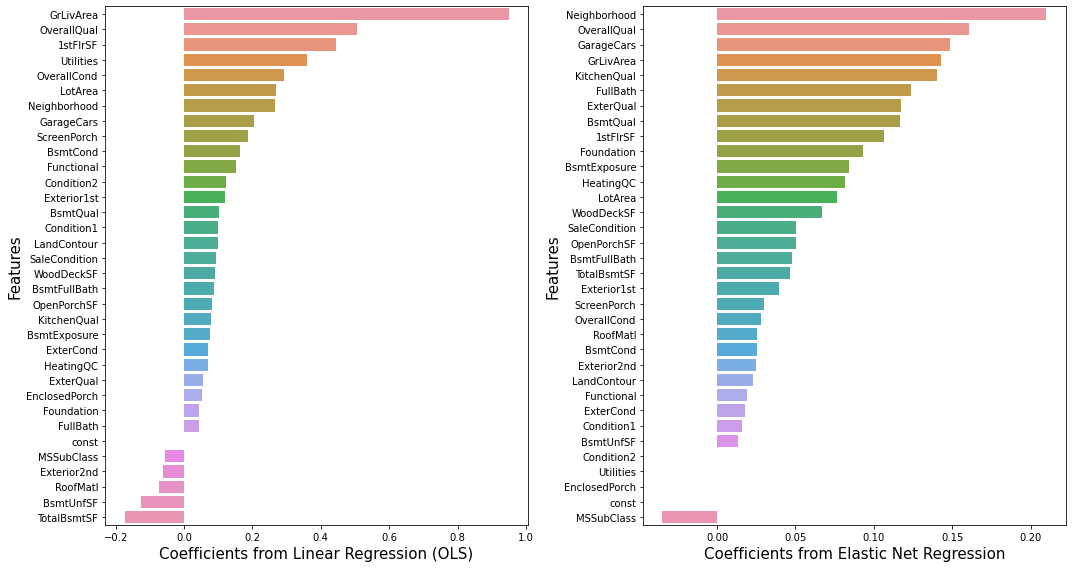

In [227]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [228]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300
1,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400
2,Ridge Regression (with alpha = 1),1,-,0.897982,0.894467,0.126700
3,Ridge Regression (with alpha = 2),2,-,0.896026,0.892445,0.127600
4,Lasso Regression,0.01,-,0.784843,0.777431,0.190900
5,Elastic Net Regression,0.1,0.01,0.733928,0.724763,0.213900


<a id="grid"></a>
# GridSearchCV 

<a id="optr"></a>
# Optimal value of alpha for Ridge Regression

In [229]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
# initiate the ridge regression model
ridge = Ridge()
# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)
# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 1} 

RMSE on test set: 0.1267


With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set decreased to 0.1267.

In [230]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300
1,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400
2,Ridge Regression (with alpha = 1),1,-,0.897982,0.894467,0.126700
3,Ridge Regression (with alpha = 2),2,-,0.896026,0.892445,0.127600
4,Lasso Regression,0.01,-,0.784843,0.777431,0.190900
5,Elastic Net Regression,0.1,0.01,0.733928,0.724763,0.213900
6,Ridge Regression (using GridSearchCV),1,-,0.897982,0.894467,0.126700


<a id="optl"></a>
# Optimal value of alpha for Lasso Regression

In [231]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
# 'max_iter':100,500,1000,1500,2000
# initiate the lasso regression model 
lasso = Lasso()
# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.001} 

RMSE on test set: 0.1264


In [232]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300
1,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400
2,Ridge Regression (with alpha = 1),1,-,0.897982,0.894467,0.126700
3,Ridge Regression (with alpha = 2),2,-,0.896026,0.892445,0.127600
4,Lasso Regression,0.01,-,0.784843,0.777431,0.190900
5,Elastic Net Regression,0.1,0.01,0.733928,0.724763,0.213900
6,Ridge Regression (using GridSearchCV),1,-,0.897982,0.894467,0.126700
7,Lasso Regression (using GridSearchCV),0.001000,-,0.892445,0.888740,0.126400


<a id="opte"></a>
# Optimal value of alpha for Elastic Net Regression

In [233]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 0.2} 

RMSE on test set: 0.1258


With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is 0.1215.

In [234]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Linear Regression,-,-,0.904670,0.901386,0.144300
1,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400
2,Ridge Regression (with alpha = 1),1,-,0.897982,0.894467,0.126700
3,Ridge Regression (with alpha = 2),2,-,0.896026,0.892445,0.127600
4,Lasso Regression,0.01,-,0.784843,0.777431,0.190900
5,Elastic Net Regression,0.1,0.01,0.733928,0.724763,0.213900
6,Ridge Regression (using GridSearchCV),1,-,0.897982,0.894467,0.126700
7,Lasso Regression (using GridSearchCV),0.001000,-,0.892445,0.888740,0.126400
8,Elastic Net Regression (using GridSearchCV),0.001000,0.200000,0.897267,0.893729,0.125800


<a id="score"></a>
# Score Card Summary
We sort the dataframe score_card to get the model with least RMSE in the top.

In [235]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE
0,Elastic Net Regression (using GridSearchCV),0.001000,0.200000,0.897267,0.893729,0.125800
1,Lasso Regression (using GridSearchCV),0.001000,-,0.892445,0.888740,0.126400
2,Ridge Regression (with alpha = 1),1,-,0.897982,0.894467,0.126700
3,Ridge Regression (using GridSearchCV),1,-,0.897982,0.894467,0.126700
4,Ridge Regression (with alpha = 2),2,-,0.896026,0.892445,0.127600
5,Linear Regression,-,-,0.904670,0.901386,0.144300
6,Lasso Regression,0.01,-,0.784843,0.777431,0.190900
7,Elastic Net Regression,0.1,0.01,0.733928,0.724763,0.213900
8,Linear Regression (using SGD),-,-,0.371262,0.349603,0.342400


We can see that Elastic Net Regression (using GridSearchCV) has the lowest test RMSE. Here, ridge regression with alpha = 0.00100 seems to deal with the problem of overfitting efficiently.

In [236]:
hide_toggle(for_next=True)

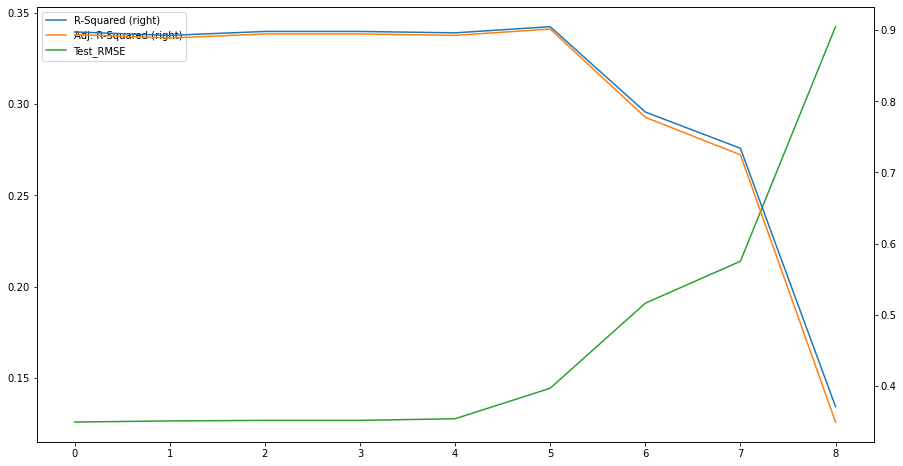

In [237]:
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.show()

The graph shows the performance metrics root mean squared error, R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, the better the R-squared value naturally the lesser is the RMSE value.

Findings suggest that the elastic net regression  algorithm has the highest accuracy with lowest RMSE. Finally, it can be concluded that the elastic net regression can be used to predict the house price for its customers.


![](Thank.jpg)